In [1]:
# Standard imports
from pathlib import Path
import pandas as pd
import numpy as np

# Import our refactored modules
from athletes_brain.fig1 import (
    Fig1Config,
    AthletesBrainDataLoader,
    GroupComparison,
    BrainPlotter,
    generate_figure1,
)

# Import specific functions for focused analysis
from athletes_brain.fig1.main import analyze_specific_comparison, get_most_significant_regions

2025-09-07 16:01:22.520 | INFO     | athletes_brain.config:<module>:11 - PROJ_ROOT path is: /home/galkepler/Projects/athletes_brain


In [2]:
metrics = ["gm_vol", "wm_vol", "csf_vol", "adc", "fa", "ad", "rd"]
# Initialize configuration
config = Fig1Config()
config.METRICS = metrics

# Set up matplotlib configuration for consistent plots
config.setup_matplotlib_config()

# Display configuration
print(f"Atlas: {config.ATLAS}")
print(f"Metrics: {config.METRICS}")
print(
    f"Group labels: {config.CLIMBER_GROUP_LABEL}, {config.BJJ_GROUP_LABEL}, {config.CONTROL_GROUP_LABEL}"
)
print(f"P-value threshold: {config.P_THRESHOLD}")
print(f"Visualization range: [{config.VMIN}, {config.VMAX}]")

Atlas: schaefer2018tian2020_400_7
Metrics: ['gm_vol', 'wm_vol', 'csf_vol', 'adc', 'fa', 'ad', 'rd']
Group labels: Climbing, Bjj, Control
P-value threshold: 0.05
Visualization range: [-5, 5]


In [97]:
FORCE = False
GROUP = "bjj"
output_dir = Path("/media/storage/phd") / "athletes_brain" / "figures" / "predictions" / GROUP

In [4]:
# Initialize data loader
data_loader = AthletesBrainDataLoader(config)

# Load all data
metric_data, parcels, nifti_path, nifti_matlab_path = data_loader.load_all_data()

print(f"Loaded {len(metric_data)} metrics")
print(f"Loaded {len(parcels)} brain parcels")
print(f"Metrics: {list(metric_data.keys())}")

metric_data = {key: val[val["cs_valid"]] for key, val in metric_data.items()}

# Display sample data (demographics)
d = metric_data["gm_vol"].drop_duplicates(subset=["subject_code"], keep="first")
print(f"N participants: {d.shape[0]}")

2025-09-07 16:01:23.942 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:48 - Loading metric data...
2025-09-07 16:01:23.942 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading gm_vol data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (1,6,7,8,9,10,11,12,68,74,78,79,80,81,82,84,85,86,87,92,93,94,95,96,97,99,113,115,116,121,122,123,124,125,132,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-07 16:01:42.432 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1595356 records for gm_vol
2025-09-07 16:01:42.432 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading wm_vol data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (1,6,7,8,9,10,11,12,68,74,78,79,80,81,82,84,85,86,87,92,93,94,95,96,97,99,113,115,116,121,122,123,124,125,132,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-07 16:01:59.282 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1595356 records for wm_vol
2025-09-07 16:01:59.282 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading csf_vol data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (1,6,7,8,9,10,11,12,68,74,78,79,80,81,82,84,85,86,87,92,93,94,95,96,97,99,113,115,116,121,122,123,124,125,132,133,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-07 16:02:16.467 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1595356 records for csf_vol
2025-09-07 16:02:16.467 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading adc data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,80,81,86,87,88,89,96,97,98,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-07 16:02:28.891 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1600350 records for adc
2025-09-07 16:02:28.891 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading fa data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,80,81,86,87,88,89,96,97,98,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-07 16:02:41.337 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1600350 records for fa
2025-09-07 16:02:41.337 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading ad data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,80,81,86,87,88,89,96,97,98,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-07 16:02:53.453 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1600350 records for ad
2025-09-07 16:02:53.454 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:54 - Loading rd data


/home/galkepler/Projects/athletes_brain/athletes_brain/fig1/data_loader.py:57: DtypeWarning: Columns (16,23,24,25,26,27,33,39,43,44,45,46,47,49,50,51,52,57,58,59,60,61,62,64,78,80,81,86,87,88,89,96,97,98,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(self.processed_dir / f"{metric}.csv", index_col=0).reset_index(


2025-09-07 16:03:05.684 | INFO     | athletes_brain.fig1.data_loader:load_metric_data:82 - Loaded 1600350 records for rd
2025-09-07 16:03:05.685 | SUCCESS  | athletes_brain.fig1.data_loader:load_metric_data:84 - Successfully loaded 7 metrics
2025-09-07 16:03:05.685 | INFO     | athletes_brain.fig1.data_loader:load_atlas_data:32 - Loading atlas data for schaefer2018tian2020_400_7
2025-09-07 16:03:05.687 | INFO     | athletes_brain.fig1.data_loader:load_atlas_data:39 - Loaded 454 parcels from atlas
Loaded 7 metrics
Loaded 454 brain parcels
Metrics: ['gm_vol', 'wm_vol', 'csf_vol', 'adc', 'fa', 'ad', 'rd']
N participants: 1550


In [98]:
# crop target to group
for metric, df in metric_data.items():
    if GROUP != "all":
        indices_to_drop = df[(df["target"]) & (df["group"].str.lower() != GROUP)].index
        df = df.drop(index=indices_to_drop)
    metric_data[metric] = df

In [99]:
import pandas as pd
from functools import reduce

region_col = config.REGION_COL


def long_to_wide(
    long_df,
    *,
    index="subject_code",
    columns=region_col,
    values="value",
):
    """Pivot a long metric table → wide DataFrame (subjects × regions)."""
    wide = long_df.pivot_table(index=index, columns=columns, values=values)
    # Optional: drop regions with >20 % missing values
    # thresh = int(0.8 * len(wide))
    # wide = wide.dropna(axis=1, thresh=thresh)
    # Optional: drop subejcts with >20 % missing values
    # thresh = int(0.8 * len(parcels))
    # wide = wide.dropna(axis=0, thresh=thresh)
    return wide


def prep_metric_matrices(metric_dict, *, index="subject_code", target_column="target"):
    """
    Parameters
    ----------
    metric_dict : {metric_name: long_df}
        Each DataFrame must include `subject_id`, `region`, `value`,
        `age_at_scan`, and any covariates you want.
    Returns
    -------
    X_dict : {metric_name: ndarray}
             Wide feature matrices aligned on the *intersection* of subjects.
    y, w, cov_df : Series / ndarray
             Age, weights, and any extra covariates for the same subjects.
    """
    # 1.  Convert every long → wide
    wide_dict = {m: long_to_wide(df, index=index) for m, df in metric_dict.items()}

    # 2.  Intersect subject index across all metrics
    common_subs = reduce(pd.Index.intersection, [w.index for w in wide_dict.values()])

    # 3.  Slice & order every matrix
    for m in wide_dict:
        wide_dict[m] = wide_dict[m].loc[common_subs]

    # 4.  Pull y, w, covariates from *any* of the long dfs (they all duplicate)
    ref_long = next(iter(metric_dict.values()))
    ref_meta = (
        ref_long.drop_duplicates(subset=index)  # one row per subject
        .set_index(index)
        .reindex(common_subs)
    )
    # ref_meta = ref_long[ref_long[index].isin(common_subs)]
    y = ref_meta[target_column].astype(bool)  # target column must be boolean

    cov = ref_meta[ref_meta.columns.difference([target_column])]

    # 5.  Convert features to numpy (sklearn ready)
    X_dict = {m: wide for m, wide in wide_dict.items()}
    return X_dict, y, cov

In [100]:
# -------------------------------------------------------
# Build (X, y, w, cov) once, re-use in every metric loop
# -------------------------------------------------------
X_dict, y, cov = prep_metric_matrices(metric_data, index="session_id")
# y_mean = y.mean()
# y = y - y_mean  # center the target variable
# Example list of covariates you want to *keep* (z-scored later if needed)
cov_names = {
    m: ["age_at_scan", "sex"] if "vol" not in m else ["age_at_scan", "sex", "tiv"] for m in metrics
}  # e.g. ["sex", "tiv"]

In [101]:
print(y.value_counts(), y.value_counts(normalize=True))

target
False    1760
True       81
Name: count, dtype: int64 target
False    0.956002
True     0.043998
Name: proportion, dtype: float64


In [102]:
# Do classification
import numpy as np, pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier

# xgb
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict, GroupKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.svm import SVC


alphas = np.logspace(-3, 4, 30)  # ridge λ grid

outer_cv = GroupKFold(
    n_splits=10,
    # shuffle=True,
    # random_state=1,
)

RANDOM_STATE = 42

N_PERMUTATIONS = 1000

ESTIMATORS = {
    "sgd": SGDClassifier(random_state=42, max_iter=int(1e6), early_stopping=True),
    "rf": RandomForestClassifier(random_state=42, n_jobs=10),
    "svm": SVC(random_state=42, kernel="rbf", probability=True),
    "logreg": LogisticRegression(random_state=42, max_iter=int(1e6)),
    "xgboost": xgb.XGBClassifier(random_state=42, scale_pos_weight=10, n_jobs=10),
    "ridge": RidgeClassifier(random_state=42),
}

PARAM_GRIDS = {
    "sgd": {
        "alpha": alphas,
        #  "loss": ["squared_error", "log_loss"],
        "loss": ["log_loss"],
        "penalty": ["l2"],
        #  "l1_ratio": [0.15, 0.5, 0.85],
        "class_weight": ["balanced", None],
    },
    "rf": {
        "n_estimators": [100, 200, 300],
        "max_depth": [5, 50, 100, None],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False],
        "class_weight": ["balanced", None],
    },
    "svm": {
        "C": alphas,
        "kernel": ["linear", "rbf", "poly"],
        "gamma": ["scale", "auto"],
        "degree": [2, 3, 4],  # Only relevant for 'poly' kernel
        "class_weight": ["balanced", None],
    },
    "logreg": {
        "C": alphas,
        "penalty": ["l2"],
        "solver": ["saga"],  # 'liblinear' supports 'l1' and 'l2' penalties
        "class_weight": ["balanced", None],
    },
    "xgboost": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.8, 0.9, 1.0],
        "colsample_bytree": [0.8, 0.9, 1.0],
    },
    "ridge": {"alpha": alphas, "class_weight": ["balanced", None]},
}

# Choose model and define parameter grid(s)
estimator_name = "sgd"
estimator = ESTIMATORS[estimator_name]
param_grid = PARAM_GRIDS[estimator_name]
param_grid = {f"estimator__{key}": value for key, value in param_grid.items()}

scaler = RobustScaler()

pipeline = Pipeline(
    [
        ("scaler", scaler),  # StandardScaler for feature scaling
        # ("pca", pca),  # PCA for dimensionality reduction
        ("estimator", estimator),  # Base estimator (e.g., xgboost)
    ]
)

groups = cov["subject_code"]

In [103]:
import numpy as np, pandas as pd
from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.model_selection import (
    KFold,
    cross_val_predict,
    cross_val_score,
    permutation_test_score,
)
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pickle

df_template = pd.DataFrame(columns=["scorer", "fold", "score"])

predictions_template = cov.copy()
predictions_template[["true", "proba"]] = np.nan

permutations_df_template = pd.DataFrame(
    columns=["scorer", "permutation", "score", "permutation_score", "pvalue"],
    index=range(N_PERMUTATIONS),
)

for metric, X in X_dict.items():
    # if metric != "ad":
    #     continue
    print(f"Processing metric: {metric}")
    metric_output_dir = output_dir / metric
    metric_output_dir.mkdir(parents=True, exist_ok=True)

    print(y.value_counts(), y.value_counts(normalize=True))
    measure_fname = metric_output_dir / "measurements.csv"
    predictions_fname = metric_output_dir / "predictions.csv"
    permutations_fname = metric_output_dir / "permutations.csv"

    if (not FORCE) and (
        measure_fname.exists() and predictions_fname.exists() and permutations_fname.exists()
    ):
        measure_df = pd.read_csv(measure_fname)
        predictions_df = pd.read_csv(predictions_fname)
        permutations_df = pd.read_csv(permutations_fname)
        continue  # Skip if already processed

    measure_df = df_template.copy()
    permutations_df = pd.DataFrame()
    predictions_df = predictions_template.copy()
    # Optionally concatenate covariates
    covariates = cov_names[metric]
    if cov_names:
        # X_model = np.hstack([X, cov[covariates].to_numpy()])
        X_model = pd.concat([X, cov[covariates]], axis=1)
    else:
        X_model = X
    X_model.columns = X_model.columns.astype(str)  # Ensure all columns are strings for consistency

    grid = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=outer_cv,
        scoring="average_precision",
        n_jobs=20,
        refit=True,
        verbose=1,
    )
    # Fit the model
    grid.fit(X_model, y, groups=groups)
    model = grid.best_estimator_
    for scorer in ["average_precision", "roc_auc", "f1"]:
        scores = cross_val_score(
            grid.best_estimator_, X_model, y, cv=outer_cv, scoring=scorer, groups=groups, n_jobs=10
        )
        print(f"{scorer} mean: {np.mean(scores)}, std: {np.std(scores)}")
        splits = outer_cv.split(X_model, y, groups=groups)
        perm_score, permutation_scores, pvalue = permutation_test_score(
            grid.best_estimator_,
            X_model,
            y,
            cv=splits,
            scoring=scorer,
            n_permutations=N_PERMUTATIONS,
            n_jobs=20,
        )
        # break
        for fold, score in enumerate(scores):
            measure_df.loc[len(measure_df)] = [
                scorer,
                fold,
                score,
            ]

        cur_permutations_df = permutations_df_template.copy()
        cur_permutations_df["scorer"] = scorer
        cur_permutations_df["permutation"] = np.arange(N_PERMUTATIONS)
        cur_permutations_df["score"] = perm_score
        cur_permutations_df["permutation_score"] = permutation_scores
        cur_permutations_df["pvalue"] = pvalue
        permutations_df = pd.concat([permutations_df, cur_permutations_df], ignore_index=True)

    y_pred_proba = cross_val_predict(
        model, X_model, y, cv=outer_cv, groups=groups, n_jobs=10, method="predict_proba"
    )
    y_pred_proba = y_pred_proba[:, 1]
    # y_pred = y_pred_proba.round().astype(bool)
    predictions_df["true"] = y
    predictions_df["proba"] = y_pred_proba

    # save to output
    measure_df.to_csv(measure_fname, index=False)
    predictions_df.reset_index().to_csv(predictions_fname, index=False)
    permutations_df.to_csv(permutations_fname, index=False)

    # save model as pickle
    with open(metric_output_dir / "best_model.pkl", "wb") as f:
        pickle.dump(model, f)

    # save X and y
    with open(metric_output_dir / "X.pkl", "wb") as f:
        pickle.dump(X_model, f)
    with open(metric_output_dir / "y.pkl", "wb") as f:
        pickle.dump(y, f)

    # break

Processing metric: gm_vol
target
False    1760
True       81
Name: count, dtype: int64 target
False    0.956002
True     0.043998
Name: proportion, dtype: float64
Processing metric: wm_vol
target
False    1760
True       81
Name: count, dtype: int64 target
False    0.956002
True     0.043998
Name: proportion, dtype: float64
Processing metric: csf_vol
target
False    1760
True       81
Name: count, dtype: int64 target
False    0.956002
True     0.043998
Name: proportion, dtype: float64
Processing metric: adc
target
False    1760
True       81
Name: count, dtype: int64 target
False    0.956002
True     0.043998
Name: proportion, dtype: float64
Processing metric: fa
target
False    1760
True       81
Name: count, dtype: int64 target
False    0.956002
True     0.043998
Name: proportion, dtype: float64
Processing metric: ad
target
False    1760
True       81
Name: count, dtype: int64 target
False    0.956002
True     0.043998
Name: proportion, dtype: float64
Processing metric: rd
target
Fal

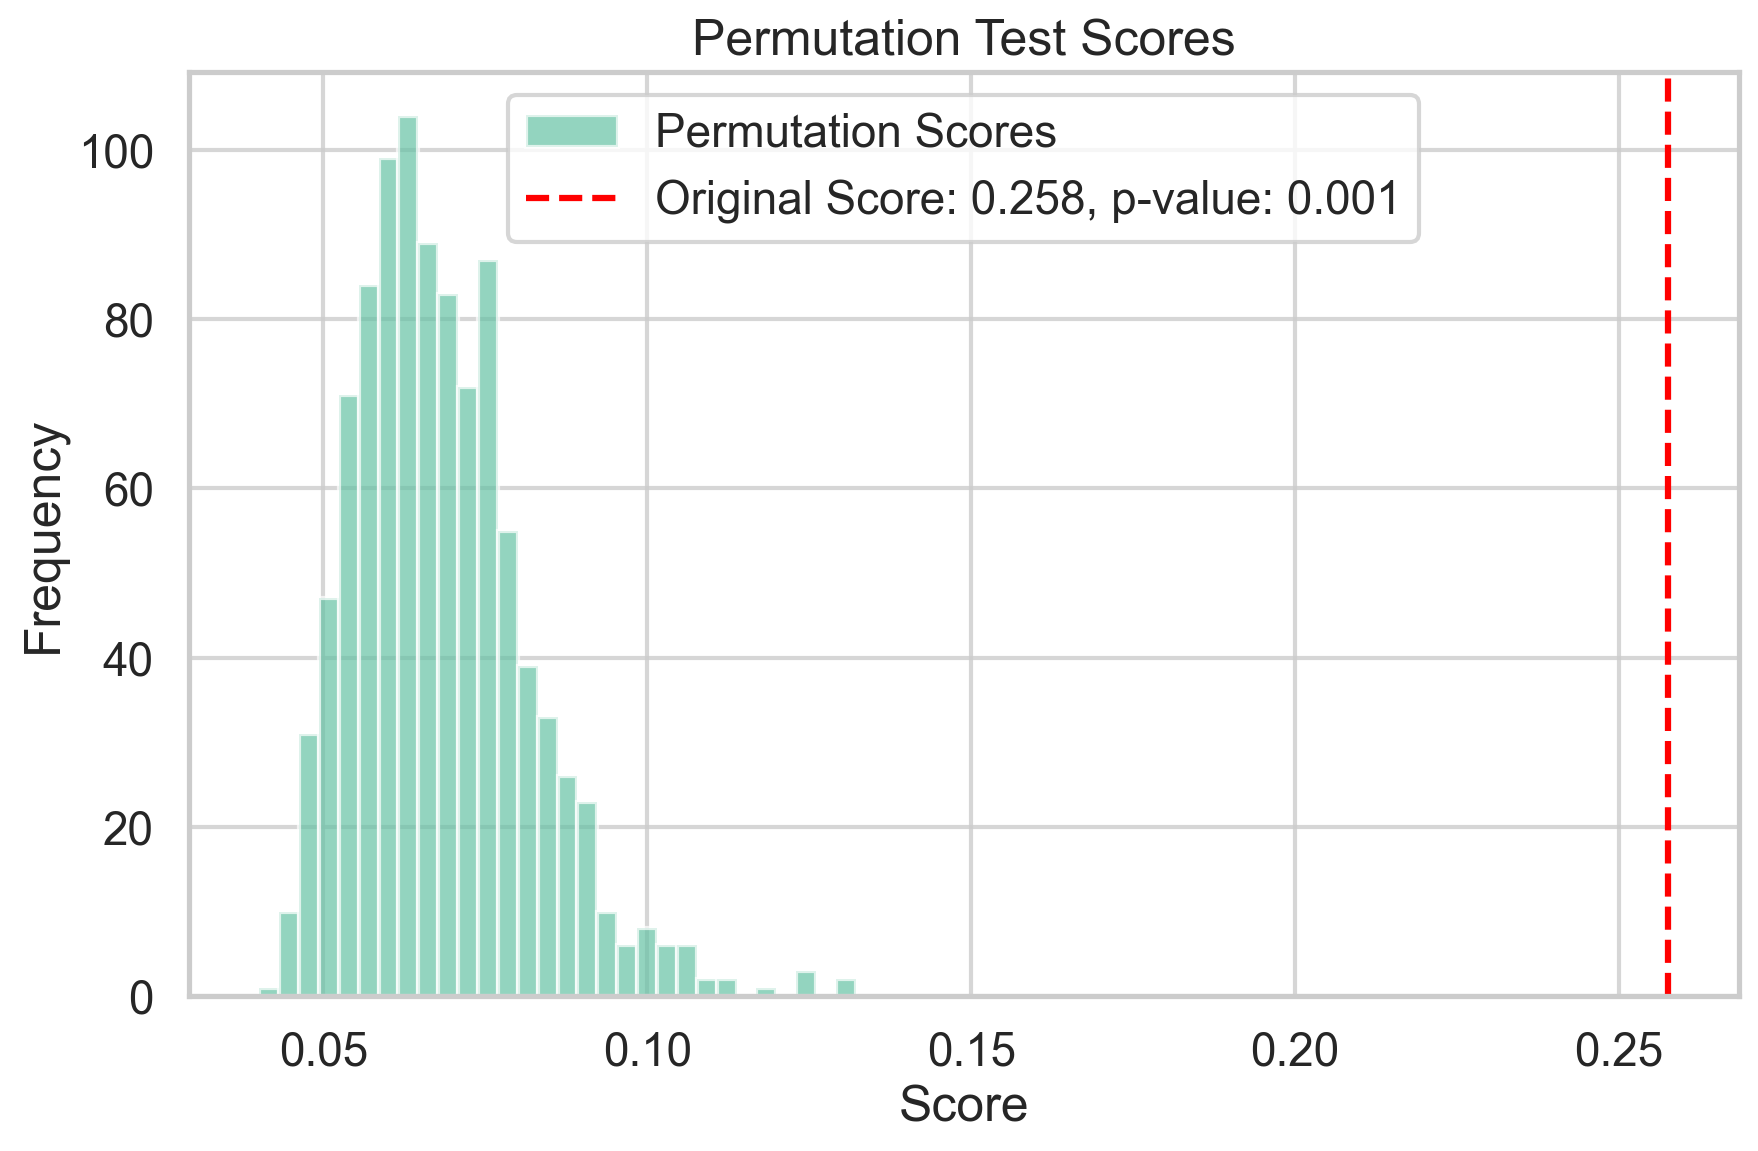

In [104]:
import matplotlib.pyplot as plt

metric = "ad"

scorer = "average_precision"

permutations_df = pd.read_csv(output_dir / metric / "permutations.csv")

permutations_df = permutations_df[permutations_df["scorer"] == scorer]

permutation_scores = permutations_df["permutation_score"].values
perm_score = permutations_df["score"].values[0]
pvalue = permutations_df["pvalue"].values[0]

plt.figure(figsize=(10, 6))
plt.hist(permutation_scores, bins=30, alpha=0.7, label="Permutation Scores")
plt.axvline(
    perm_score,
    color="red",
    linestyle="--",
    label=f"Original Score: {perm_score:.3f}, p-value: {pvalue:.3f}",
)
plt.title("Permutation Test Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [105]:
from tqdm import tqdm


def collect_feature_matrix(metrics_data: dict, roi: str):
    """
    Collect all metrics from a specific roi to a feature matrix.

    Parameters
    ----------
    metrics_data : dict
        A dictionary containing the metrics data.
    roi : str
        The region of interest.
    """
    return pd.DataFrame({metric: metrics_data[metric][roi] for metric in metrics_data.keys()})


# stacking
X_meta = pd.DataFrame(index=cov.index, columns=parcels[region_col].astype(str).to_list())

# Choose model and define parameter grid(s)
base_estimator_name = "sgd"
base_estimator = ESTIMATORS[base_estimator_name]
base_param_grid = PARAM_GRIDS[base_estimator_name]
base_param_grid = {f"estimator__{key}": value for key, value in base_param_grid.items()}

base_pipeline = Pipeline(
    [
        ("scaler", scaler),  # StandardScaler for feature scaling
        # ("pca", pca),  # PCA for dimensionality reduction
        ("estimator", base_estimator),  # Base estimator (e.g., xgboost)
    ]
)

for i, row in tqdm(parcels.iterrows(), total=parcels.shape[0], desc="Processing Parcels"):
    # generate feature matrix for parcel i (all metrics)
    roi = row[region_col]

    roi_destination = output_dir / "stacked" / str(roi)
    roi_destination.mkdir(parents=True, exist_ok=True)

    # measure_fname = roi_destination / "measurements.csv"
    predictions_fname = roi_destination / "predictions.csv"
    # permutations_fname = roi_destination / "permutations.csv"

    if not FORCE and (
        predictions_fname.exists() 
        # and measure_fname.exists() and and permutations_fname.exists()
    ):
        measure_df = pd.read_csv(measure_fname)
        predictions_df = pd.read_csv(predictions_fname)
        permutations_df = pd.read_csv(permutations_fname)
        X_meta[str(roi)] = predictions_df["proba"].values
        continue  # Skip if already processed

    X_roi = collect_feature_matrix(X_dict, roi)
    # add covariates
    X_roi[cov_names["gm_vol"]] = cov[cov_names["gm_vol"]]

    measure_df = df_template.copy()
    permutations_df = pd.DataFrame()
    predictions_df = predictions_template.copy()

    # break
    grid = GridSearchCV(
        base_pipeline,
        param_grid=base_param_grid,
        cv=outer_cv,
        scoring="average_precision",
        n_jobs=10,
        refit=True,
        verbose=0,
    )
    # Fit the model
    grid.fit(X_roi, y, groups=groups)
    model = grid.best_estimator_
    # for scorer in ["average_precision", "roc_auc", "f1"]:
    #     scores = cross_val_score(
    #         grid.best_estimator_, X_roi, y, cv=outer_cv, scoring=scorer, groups=groups, n_jobs=10
    #     )
    #     if scorer == "average_precision":
    #         print(f"{scorer} mean: {np.mean(scores)}, std: {np.std(scores)}")
    #     splits = outer_cv.split(X_roi, y, groups=groups)
    #     perm_score, permutation_scores, pvalue = permutation_test_score(
    #         grid.best_estimator_,
    #         X_roi,
    #         y,
    #         cv=splits,
    #         scoring=scorer,
    #         n_permutations=N_PERMUTATIONS,
    #         n_jobs=10,
    #     )
    #     # break
    #     for fold, score in enumerate(scores):
    #         measure_df.loc[len(measure_df)] = [
    #             scorer,
    #             fold,
    #             score,
    #         ]

    #     cur_permutations_df = permutations_df_template.copy()
    #     cur_permutations_df["scorer"] = scorer
    #     cur_permutations_df["permutation"] = np.arange(N_PERMUTATIONS)
    #     cur_permutations_df["score"] = perm_score
    #     cur_permutations_df["permutation_score"] = permutation_scores
    #     cur_permutations_df["pvalue"] = pvalue
    #     permutations_df = pd.concat([permutations_df, cur_permutations_df], ignore_index=True)

    y_pred_proba = cross_val_predict(
        model, X_roi, y, cv=outer_cv, groups=groups, n_jobs=10, method="predict_proba"
    )
    y_pred_proba = y_pred_proba[:, 1]
    X_meta[str(roi)] = y_pred_proba
    # break
    predictions_df["true"] = y
    predictions_df["proba"] = y_pred_proba

    # save to output
    # measure_df.to_csv(measure_fname, index=False)
    predictions_df.to_csv(predictions_fname, index=False)
    # permutations_df.to_csv(permutations_fname, index=False)

    # save model as pickle
    with open(roi_destination / "best_model.pkl", "wb") as f:
        pickle.dump(model, f)

    # save X and y
    with open(roi_destination / "X.pkl", "wb") as f:
        pickle.dump(X_roi, f)
    with open(roi_destination / "y.pkl", "wb") as f:
        pickle.dump(y, f)
    # break

Processing Parcels:   0%|          | 0/454 [00:00<?, ?it/s]

Processing Parcels: 100%|██████████| 454/454 [00:08<00:00, 51.36it/s]


In [106]:
# import matplotlib.pyplot as plt

# roi = np.random.choice(parcels[region_col].to_list())

# scorer = "average_precision"

# permutations_df = pd.read_csv(output_dir / "stacked" / str(roi) / "permutations.csv")

# permutations_df = permutations_df[permutations_df["scorer"] == scorer]

# permutation_scores = permutations_df["permutation_score"].values
# perm_score = permutations_df["score"].values[0]
# pvalue = permutations_df["pvalue"].values[0]

# plt.figure(figsize=(10, 6))
# plt.hist(permutation_scores, bins=30, alpha=0.7, label="Permutation Scores")
# plt.axvline(
#     perm_score,
#     color="red",
#     linestyle="--",
#     label=f"Original Score: {perm_score:.3f}, p-value: {pvalue:.3f}",
# )
# plt.title("Permutation Test Scores")
# plt.xlabel("Score")
# plt.ylabel("Frequency")
# plt.legend()
# plt.show()

In [107]:

stacked_destination = output_dir / "stacked"
stacked_destination.mkdir(parents=True, exist_ok=True)

measure_fname = stacked_destination / "measurements.csv"
predictions_fname = stacked_destination / "predictions.csv"
permutations_fname = stacked_destination / "permutations.csv"

if not FORCE and (
    measure_fname.exists() and predictions_fname.exists() and permutations_fname.exists()
):
    measure_df = pd.read_csv(measure_fname)
    predictions_df = pd.read_csv(predictions_fname)
    permutations_df = pd.read_csv(permutations_fname)
    with open(stacked_destination / "best_model.pkl", "rb") as f:
        model = pickle.load(f)
    with open(stacked_destination / "X.pkl", "rb") as f:
        X_meta = pickle.load(f)
    with open(stacked_destination / "y.pkl", "rb") as f:
        y = pickle.load(f)

else:

    measure_df = df_template.copy()
    permutations_df = pd.DataFrame()
    predictions_df = predictions_template.copy()

    # add covariates
    X_meta[cov_names["gm_vol"]] = cov[cov_names["gm_vol"]]

    X_meta.columns = X_meta.columns.astype(str)  # Ensure all columns are strings for consistency

    # break
    grid = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=outer_cv,
        scoring="average_precision",
        n_jobs=10,
        refit=True,
        verbose=1,
    )
    # Fit the model
    grid.fit(X_meta, y, groups=groups)
    model = grid.best_estimator_
    for scorer in ["average_precision", "roc_auc", "f1"]:
        scores = cross_val_score(
            grid.best_estimator_, X_meta, y, cv=outer_cv, scoring=scorer, groups=groups, n_jobs=10
        )
        print(f"{scorer} mean: {np.mean(scores)}, std: {np.std(scores)}")
        splits = outer_cv.split(X_meta, y, groups=groups)
        perm_score, permutation_scores, pvalue = permutation_test_score(
            grid.best_estimator_,
            X_meta,
            y,
            cv=splits,
            scoring=scorer,
            n_permutations=N_PERMUTATIONS,
            n_jobs=10,
        )
        # break
        for fold, score in enumerate(scores):
            measure_df.loc[len(measure_df)] = [
                scorer,
                fold,
                score,
            ]

        cur_permutations_df = permutations_df_template.copy()
        cur_permutations_df["scorer"] = scorer
        cur_permutations_df["permutation"] = np.arange(N_PERMUTATIONS)
        cur_permutations_df["score"] = perm_score
        cur_permutations_df["permutation_score"] = permutation_scores
        cur_permutations_df["pvalue"] = pvalue
        permutations_df = pd.concat([permutations_df, cur_permutations_df], ignore_index=True)

    y_pred_proba = cross_val_predict(
        model, X_meta, y, cv=outer_cv, groups=groups, n_jobs=10, method="predict_proba"
    )
    y_pred_proba = y_pred_proba[:, 1]
    # break
    predictions_df["true"] = y
    predictions_df["proba"] = y_pred_proba

    # save to output
    measure_df.to_csv(stacked_destination / "measurements.csv", index=False)
    predictions_df.to_csv(stacked_destination / "predictions.csv", index=False)
    permutations_df.to_csv(stacked_destination / "permutations.csv", index=False)

    # save model as pickle
    with open(stacked_destination / "best_model.pkl", "wb") as f:
        pickle.dump(model, f)

    # save X and y
    with open(stacked_destination / "X.pkl", "wb") as f:
        pickle.dump(X_meta, f)
    with open(stacked_destination / "y.pkl", "wb") as f:
        pickle.dump(y, f)
    # break

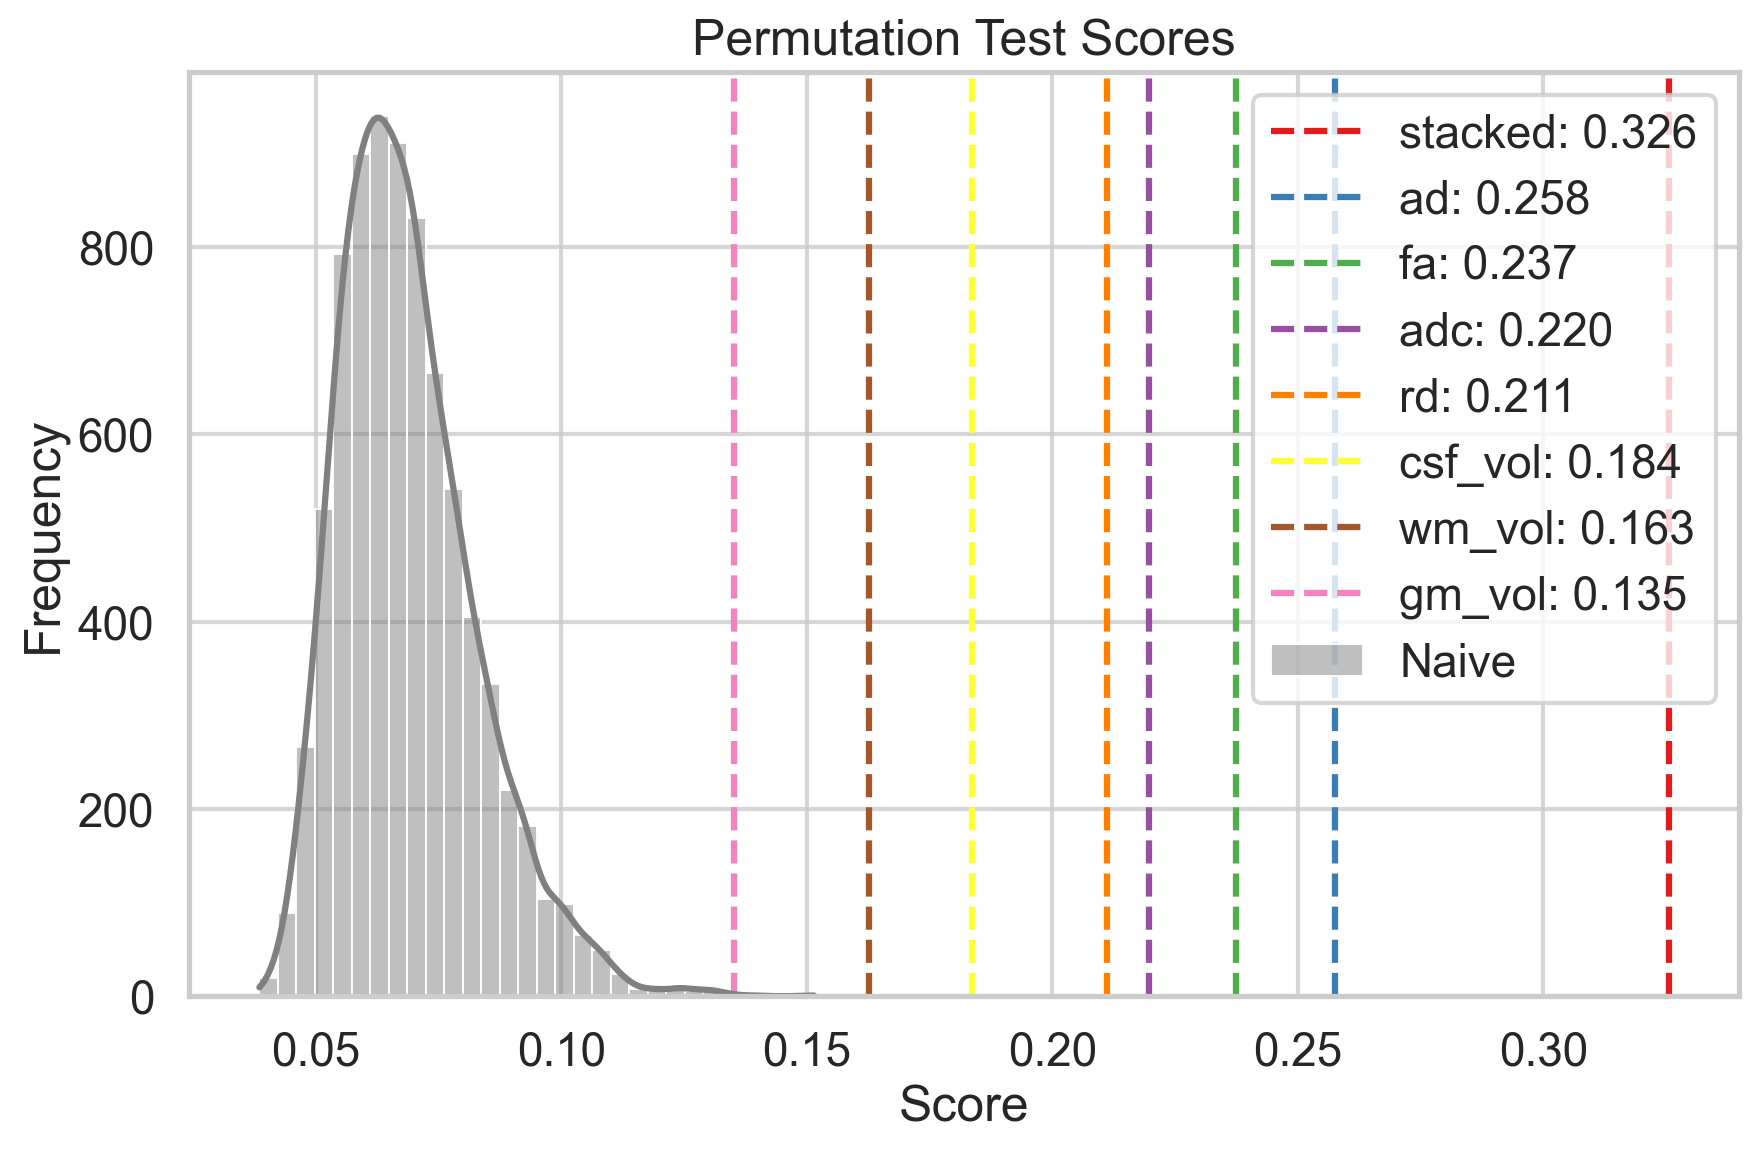

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
from athletes_brain.fig1.config import savefig_nice

scorer = "average_precision"
fig, ax = plt.subplots(figsize=(10, 6))

# set color palette
colors = plt.get_cmap("Set1")

vis_df = pd.DataFrame()

for i, metric in enumerate(metrics + ["stacked"]):

    permutations_df = pd.read_csv(output_dir / metric / "permutations.csv")

    permutations_df = permutations_df[permutations_df["scorer"] == scorer]

    permutation_scores = permutations_df["permutation_score"].values
    perm_score = permutations_df["score"].values[0]
    pvalue = permutations_df["pvalue"].values[0]
    vis_df = pd.concat(
        [
            vis_df,
            pd.DataFrame(
                {
                    "metric": metric,
                    "permutation_score": permutation_scores,
                    "score": perm_score,
                    "pvalue": pvalue,
                }
            ),
        ],
        ignore_index=True,
    )

vis_df = vis_df.sort_values("score", ascending=False)
permutation_scores = []
for i, metric in enumerate(vis_df["metric"].unique()):
    metric_permutation_scores = vis_df[vis_df["metric"] == metric]["permutation_score"].values
    permutation_scores += metric_permutation_scores.tolist()
    perm_score = vis_df[vis_df["metric"] == metric]["score"].values[0]
    ax.axvline(
        perm_score,
        color=colors(i),
        linestyle="--",
        label=f"{metric}: {perm_score:.3f}",
    )
sns.histplot(permutation_scores, bins=30, alpha=0.5, color="gray", label="Naive", kde=True)
ax.set_title("Permutation Test Scores")
ax.set_xlabel("Score")
ax.set_ylabel("Frequency")
ax.legend()
plt.show()
# savefig_nice(fig, output_dir / "permutation_test_scores.png")

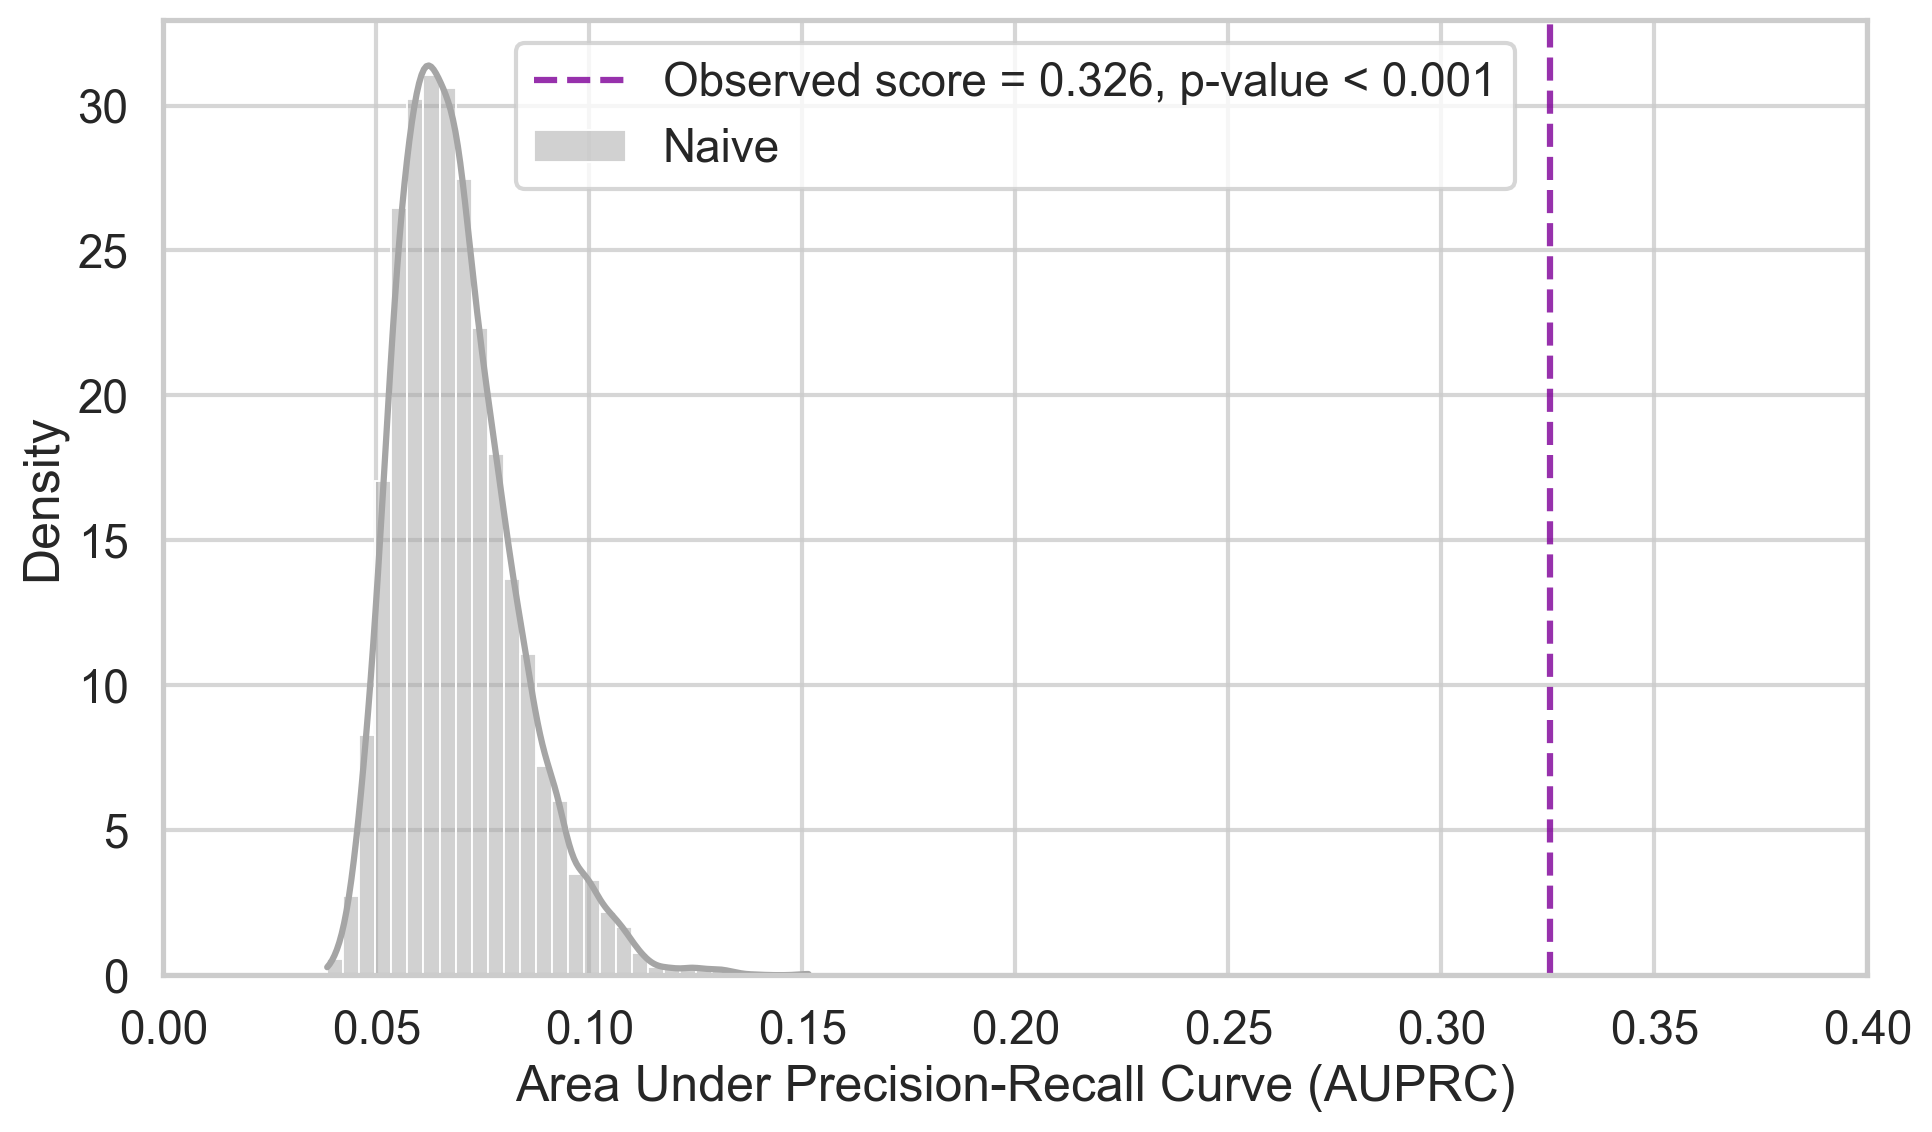

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
from athletes_brain.fig1.config import savefig_nice

scorer = "average_precision"
fig, ax = plt.subplots(figsize=(10, 6))

# set color palette
colors = plt.get_cmap("Set1")

metric_permutation_scores = vis_df[vis_df["metric"] == "stacked"]["permutation_score"].values
permutation_scores += metric_permutation_scores.tolist()
perm_score = vis_df[vis_df["metric"] == "stacked"]["score"].values[0]
ax.axvline(
    perm_score,
    color=config.COL_WEIGHTED,
    linestyle="--",
    label=f"Observed score = {perm_score:.3f}, p-value < {pvalue:.3f}",
)
sns.histplot(permutation_scores, bins=30, alpha=0.5, color=config.COL_CENSUS, label="Naive", kde=True, stat="density")
# ax.set_title("Permutation Test Scores")
ax.set_xlabel("Area Under Precision-Recall Curve (AUPRC)")
ax.set_ylabel("Density")
ax.legend()
ax.set_xlim(0, 0.4)
# plt.show()
savefig_nice(fig, output_dir / "permutation_test_scores.png")

/tmp/ipykernel_2277602/340783777.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=vis_df, x="metric", y="score", ax=ax, palette="tab10")


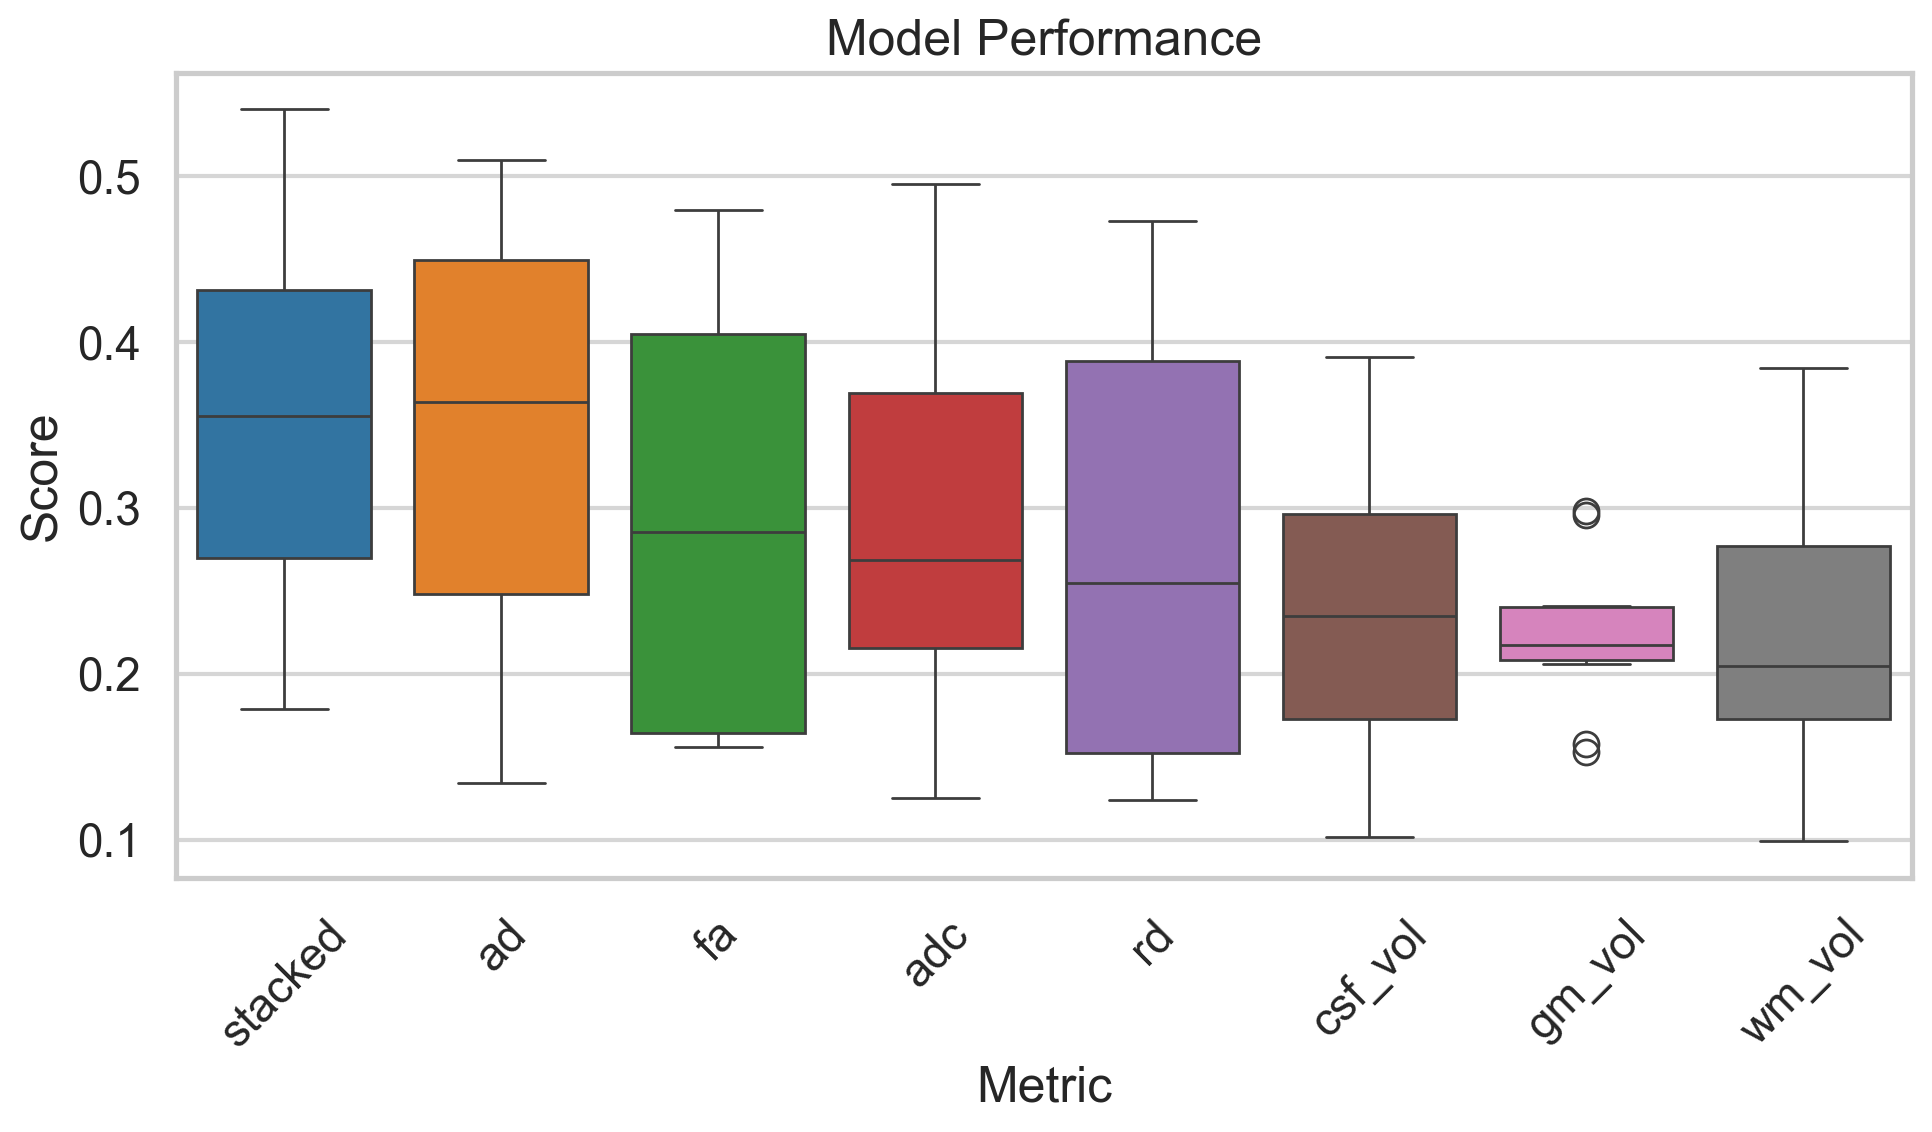

In [16]:
import seaborn as sns

scorer = "average_precision"

# set color palette
colors = plt.get_cmap("tab10")

vis_df = pd.DataFrame()

for i, metric in enumerate(metrics + ["stacked"]):

    measurements = pd.read_csv(output_dir / metric / "measurements.csv")
    measurements["metric"] = metric
    vis_df = pd.concat([vis_df, measurements], ignore_index=True)

# sort by mean scorer
vis_df = vis_df[vis_df["scorer"] == scorer]
metrics_order = vis_df.groupby("metric")["score"].mean().sort_values(ascending=False).index
vis_df = vis_df.set_index("metric").loc[metrics_order].reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=vis_df, x="metric", y="score", ax=ax, palette="tab10")
ax.set_title("Model Performance")
ax.set_xlabel("Metric")
ax.set_ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
import numpy as np
import pandas as pd
from sklearn.metrics import average_precision_score


# ---------- Calibration (ECE) ----------
def expected_calibration_error(y_true, p_pred, n_bins=10, strategy="uniform"):
    """
    ECE with either uniform-width bins or quantile bins.
    """
    y_true = np.asarray(y_true).astype(int)
    p_pred = np.asarray(p_pred)

    if strategy == "quantile":
        # quantile bin edges; handle duplicates
        qs = np.linspace(0, 1, n_bins + 1)
        bins = np.unique(np.quantile(p_pred, qs))
        # ensure at least 2 edges
        if bins.size < 2:
            bins = np.array([0.0, 1.0])
        n_bins = len(bins) - 1
    else:
        bins = np.linspace(0, 1, n_bins + 1)

    idx = np.digitize(p_pred, bins) - 1
    idx[idx == n_bins] = n_bins - 1  # clamp points at 1.0 into last bin

    ece = 0.0
    for b in range(n_bins):
        mask = idx == b
        if not np.any(mask):
            continue
        conf = p_pred[mask].mean()
        acc = y_true[mask].mean()
        ece += np.abs(acc - conf) * (mask.mean())
    return float(ece)


# ---------- Stratified bootstrap helpers ----------
def _stratified_boot_indices(y, B=5000, rng=None):
    rng = rng or np.random.default_rng(42)
    y = np.asarray(y).astype(int)
    pos_idx = np.where(y == 1)[0]
    neg_idx = np.where(y == 0)[0]
    n_pos, n_neg = len(pos_idx), len(neg_idx)
    for _ in range(B):
        samp_pos = rng.choice(pos_idx, size=n_pos, replace=True)
        samp_neg = rng.choice(neg_idx, size=n_neg, replace=True)
        yield np.concatenate([samp_pos, samp_neg])


# ---------- PR-AUC (Average Precision) CIs ----------
def bootstrap_ap_ci(y, p, alpha=0.05, B=5000, random_state=42, stratified=True):
    """
    Percentile CI for Average Precision (PR-AUC).
    """
    y = np.asarray(y).astype(int)
    p = np.asarray(p)
    rng = np.random.default_rng(random_state)

    ap_hat = average_precision_score(y, p)

    aps = []
    if stratified:
        for idx in _stratified_boot_indices(y, B=B, rng=rng):
            aps.append(average_precision_score(y[idx], p[idx]))
    else:
        n = len(y)
        for _ in range(B):
            idx = rng.integers(0, n, n)
            # skip degenerate resamples (no positives)
            if y[idx].sum() == 0 or y[idx].sum() == n:
                continue
            aps.append(average_precision_score(y[idx], p[idx]))

    aps = np.sort(np.asarray(aps))
    lo = aps[int((alpha / 2) * len(aps))]
    hi = aps[int((1 - alpha / 2) * len(aps))]
    return float(ap_hat), float(lo), float(hi), aps


def bootstrap_ap_diff_ci(y, p1, p2, alpha=0.05, B=5000, random_state=7, stratified=True):
    """
    Paired bootstrap CI and two-sided p-value for ΔAP = AP(model1) - AP(model2).
    Uses same resampled indices for both models.
    """
    y = np.asarray(y).astype(int)
    p1 = np.asarray(p1)
    p2 = np.asarray(p2)
    rng = np.random.default_rng(random_state)

    diff_hat = average_precision_score(y, p1) - average_precision_score(y, p2)

    diffs = []
    if stratified:
        for idx in _stratified_boot_indices(y, B=B, rng=rng):
            # skip degenerate resamples if they occur
            if y[idx].sum() == 0 or y[idx].sum() == len(idx):
                continue
            d = average_precision_score(y[idx], p1[idx]) - average_precision_score(y[idx], p2[idx])
            diffs.append(d)
    else:
        n = len(y)
        for _ in range(B):
            idx = rng.integers(0, n, n)
            if y[idx].sum() == 0 or y[idx].sum() == n:
                continue
            diffs.append(
                average_precision_score(y[idx], p1[idx]) - average_precision_score(y[idx], p2[idx])
            )

    diffs = np.sort(np.asarray(diffs))
    lo = diffs[int((alpha / 2) * len(diffs))]
    hi = diffs[int((1 - alpha / 2) * len(diffs))]

    # two-sided bootstrap p-value (how often diff crosses zero)
    p_two_sided = 2 * min((diffs <= 0).mean(), (diffs >= 0).mean())
    return float(diff_hat), float(lo), float(hi), float(p_two_sided), diffs

In [18]:
# ---------- Example loop (with alignment + uplift reporting) ----------
predictions = pd.DataFrame(
    index=metrics + ["stacked"],
    columns=[
        "ece",
        "ap",
        "ap_lo",
        "ap_hi",
        "delta_ap_vs_stacked",
        "delta_lo",
        "delta_hi",
        "delta_p",
        "prevalence",
        "ap_uplift",
    ],
)

bootstraps = pd.DataFrame()
#
stacked_df = pd.read_csv(output_dir / "stacked" / "predictions.csv")[
    ["subject_code", "proba", "true"]
].rename(columns={"proba": "proba_stacked"})
stacked_df["session_id"] = cov.index
#
for metric in metrics + ["stacked"]:
    df = pd.read_csv(output_dir / metric / "predictions.csv")[["subject_code", "proba", "true"]]
    df["session_id"] = cov.index
    df = df.merge(stacked_df, on=["session_id", "true"], how="inner")  # align rows!
    # break
    #
    y = df["true"].values.astype(int)
    p = df["proba"].values
    p_stacked = df["proba_stacked"].values
    #
    prev = y.mean()
    ece = expected_calibration_error(y, p, n_bins=10, strategy="quantile")
    #
    ap, ap_lo, ap_hi, ap_boot = bootstrap_ap_ci(y, p, alpha=0.05, B=5000, stratified=True)
    d_ap, d_lo, d_hi, d_p, d_boot = bootstrap_ap_diff_ci(
        y, p, p_stacked, alpha=0.05, B=5000, stratified=True
    )
    #
    predictions.loc[metric, ["ece", "ap", "ap_lo", "ap_hi"]] = [ece, ap, ap_lo, ap_hi]
    predictions.loc[metric, ["delta_ap_vs_stacked", "delta_lo", "delta_hi", "delta_p"]] = [
        d_ap,
        d_lo,
        d_hi,
        d_p,
    ]
    predictions.loc[metric, ["prevalence", "ap_uplift"]] = [prev, ap - prev]
    #
    bootstraps = pd.concat(
        [
            bootstraps,
            pd.DataFrame({"metric": metric, "bootstrap_parameter": "ap", "score": ap_boot}),
            pd.DataFrame({"metric": metric, "bootstrap_parameter": "d_ap", "score": d_boot}),
        ],
        ignore_index=True,
    )
    # break

bootstraps = bootstraps.set_index("metric")

<Axes: xlabel='proba', ylabel='Count'>

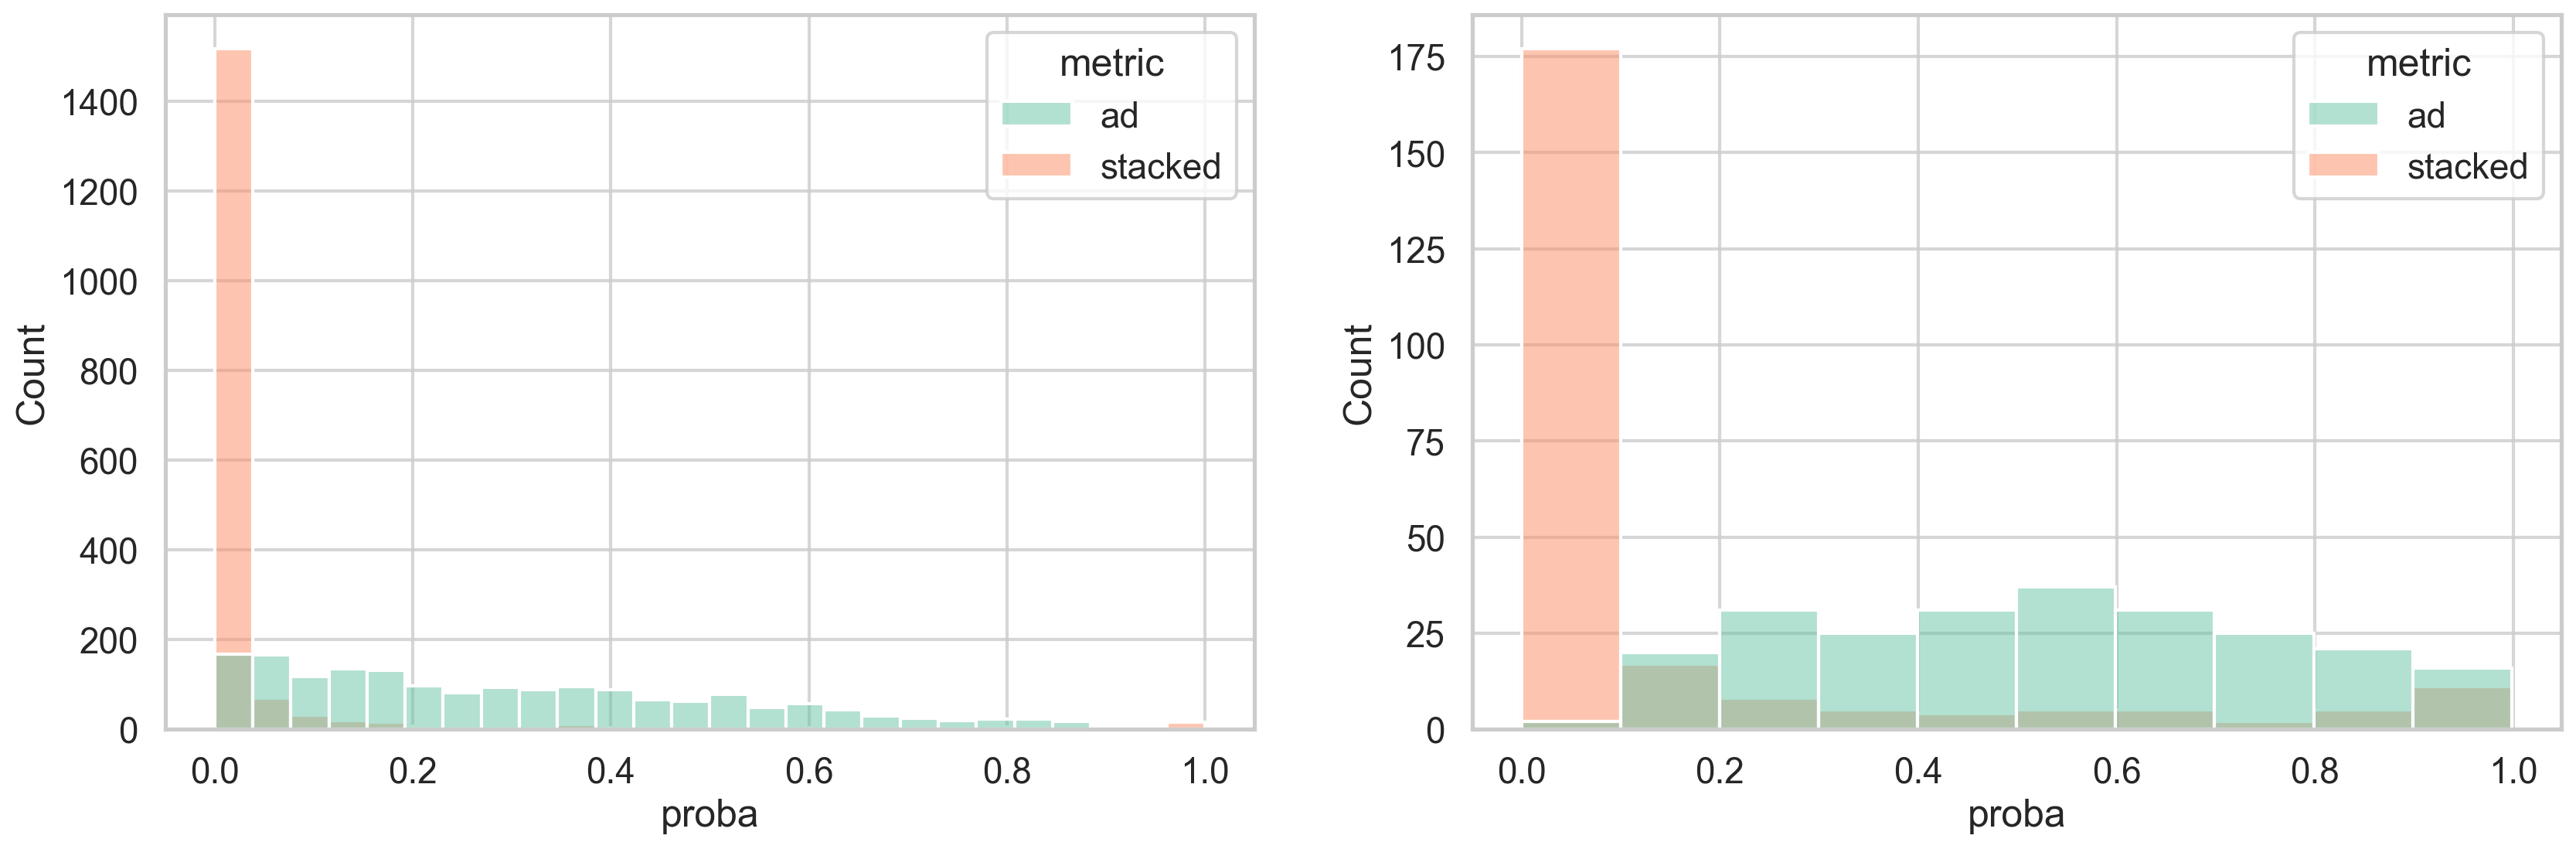

In [19]:
metric = "ad"

#
stacked_df = pd.read_csv(output_dir / "stacked" / "predictions.csv")[
    ["subject_code", "proba", "true"]
]
stacked_df["session_id"] = cov.index

df = pd.read_csv(output_dir / metric / "predictions.csv")[["subject_code", "proba", "true"]]
df["session_id"] = cov.index
# df = df.merge(stacked_df, on=["session_id","true"], how="inner")  # align rows!
df["metric"] = metric
stacked_df["metric"] = "stacked"
df = pd.concat([df, stacked_df], ignore_index=True)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(data=df[~df["true"]], x="proba", hue="metric", ax=axes[0])
sns.histplot(data=df[df["true"]], x="proba", hue="metric", ax=axes[1])

In [20]:
predictions.sort_values("ap")

,ece,ap,ap_lo,ap_hi,delta_ap_vs_stacked,delta_lo,delta_hi,delta_p,prevalence,ap_uplift
csf_vol,0.461916,0.142521,0.129576,0.163163,-0.061806,-0.098051,-0.036163,0.0,0.11956,0.022961
wm_vol,0.485632,0.155074,0.137899,0.180616,-0.049253,-0.085395,-0.021967,0.0004,0.11956,0.035514
gm_vol,0.104341,0.188445,0.165937,0.222375,-0.015881,-0.06038,0.024568,0.4276,0.11956,0.068885
adc,0.367268,0.190876,0.16897,0.226105,-0.013451,-0.051129,0.021317,0.4284,0.11956,0.071316
stacked,0.105486,0.204327,0.175009,0.2488,0.0,0.0,0.0,2.0,0.11956,0.084767
rd,0.30443,0.209602,0.18496,0.249278,0.005275,-0.034766,0.045415,0.8024,0.11956,0.090042
fa,0.245966,0.240019,0.207008,0.286123,0.035693,-0.013173,0.086135,0.1536,0.11956,0.12046
ad,0.209281,0.316632,0.271933,0.373528,0.112305,0.056443,0.168032,0.0,0.11956,0.197072


<Axes: >

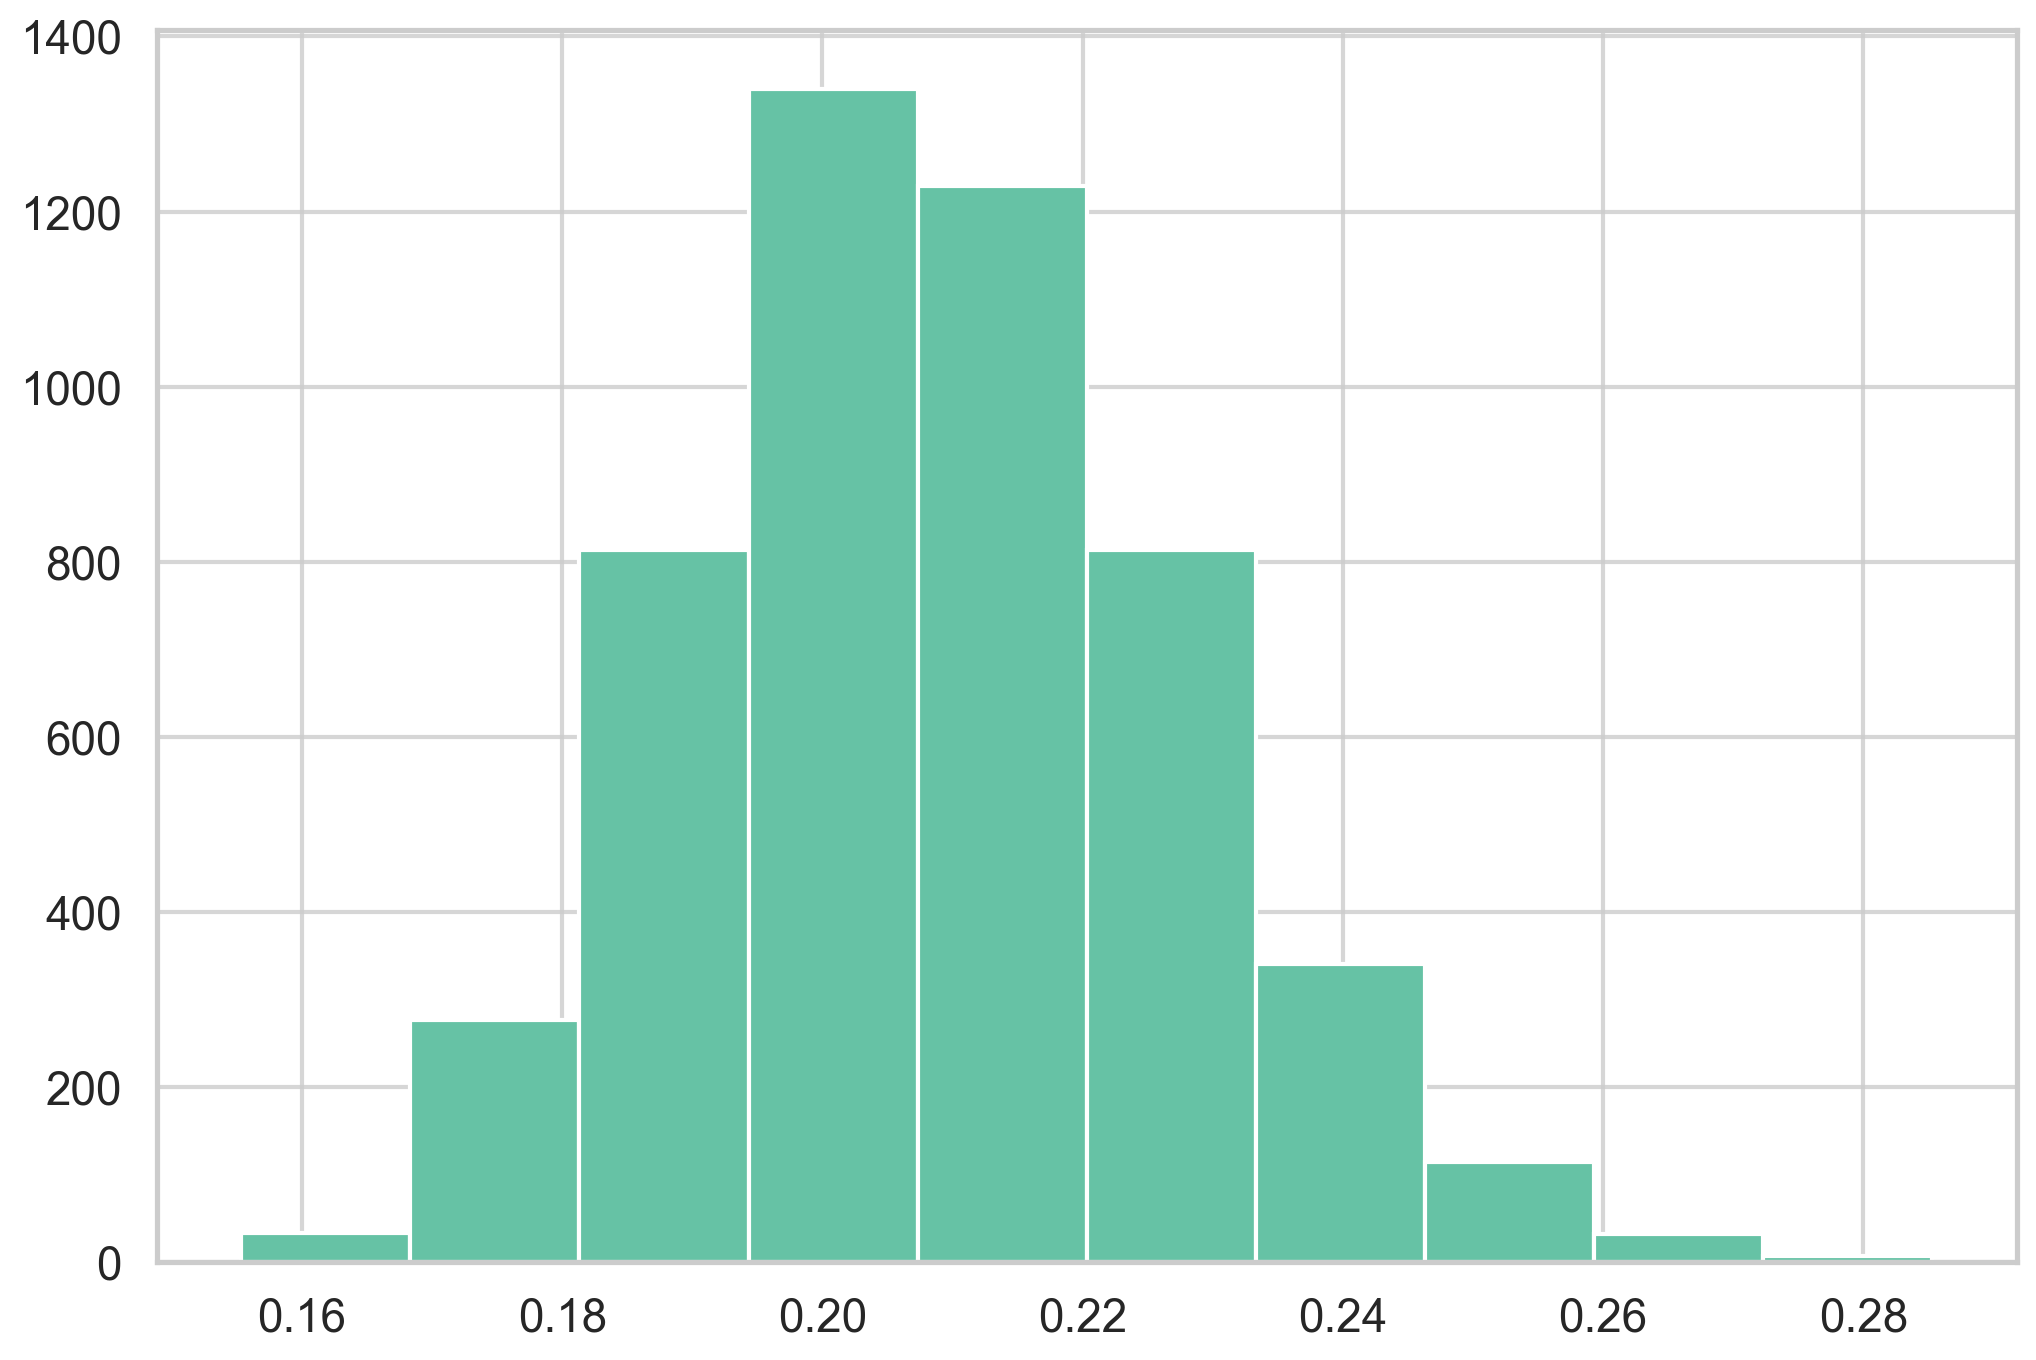

In [21]:
m = "stacked"
bootstraps.loc[m].loc[bootstraps.loc[m, "bootstrap_parameter"] == "ap"]["score"].hist()

In [31]:
from sklearn.inspection import permutation_importance

# X_meta.columns = X_meta.columns.astype(str)  # Ensure all columns are strings for consistency
importances = permutation_importance(model, X_meta, y, n_repeats=30, random_state=42)

In [43]:
import shap

pipeline_without_estimator = Pipeline(steps=model.steps[:-1])
X_transformed = pipeline_without_estimator.fit_transform(X_meta)
pipeline_estimator = model.named_steps["estimator"]
explainer = shap.Explainer(pipeline_estimator, X_transformed)
shap_values = explainer(X_transformed)

# shap.summary_plot(shap_values, features=X_meta, feature_names=X_meta.columns)



In [44]:
importances_df = parcels.copy()
importances_df["importance_mean"] = importances["importances_mean"][: len(parcels)]
importances_df["importance_std"] = importances["importances_std"][: len(parcels)]
importances_df["importance_scaled"] = importances_df["importance_mean"]
importances_df.loc[importances_df["importance_scaled"] < 0, "importance_scaled"] = 0
# min- max scale
importances_df["importance_scaled"] = (
    importances_df["importance_scaled"] - importances_df["importance_scaled"].min()
) / (importances_df["importance_scaled"].max() - importances_df["importance_scaled"].min())

importances_df["shap"] = shap_values.mean(0).values[: len(parcels)]

In [47]:
importances_df["pvalue"] = 0
importances_df.loc[importances_df["importance_scaled"] <= 0, "pvalue"] = 1


In [48]:
"""Brain visualization module for athletes brain study Figure 1."""

from pathlib import Path
from typing import Dict, Optional, Tuple
import pandas as pd
import numpy as np
from surfplot import Plot
from neuromaps.datasets import fetch_fslr
from brainspace.datasets import load_parcellation
from athletes_brain.fig1.config import savefig_nice
from subcortex_visualization.plotting import plot_subcortical_data
from loguru import logger


class BrainPlotter:
    """Class for creating brain visualizations."""

    def __init__(self, config: Optional[Fig1Config] = None):
        """Initialize the brain plotter.

        Args:
            config: Configuration object. If None, uses default Fig1Config.
        """
        self.config = config or Fig1Config()
        self.surfaces = None
        self.parcellations = None

    def setup_surfaces(self) -> None:
        """Set up brain surfaces and parcellations."""
        logger.info("Setting up brain surfaces and parcellations")

        # Fetch standard surfaces
        self.surfaces = fetch_fslr()

        # Load parcellation
        lh_parc, rh_parc = load_parcellation("schaefer")
        self.parcellations = {"lh": lh_parc, "rh": rh_parc}

        logger.success("Brain surfaces and parcellations loaded successfully")

    def prepare_value_maps(
        self,
        results_df: pd.DataFrame,
        p_column: str = "adjusted_p_value",
        value_column: str = "t_statistic",
    ) -> Tuple[Dict, Dict, pd.DataFrame]:
        """Prepare value maps for brain visualization.

        Args:
            results_df: DataFrame containing statistical results
            p_column: Column name for p-values
            value_column: Column name for values to visualize

        Returns:
            Tuple of (left hemisphere map, right hemisphere map, subcortical DataFrame)
        """
        logger.info(f"Preparing value maps for {value_column}")

        value_map_lh = {}
        value_map_rh = {}
        value_map_subcortex = {"region": [], "value": [], "Hemisphere": []}

        for i, row in results_df.iterrows():
            label = row[self.config.REGION_COL]
            hemi_row = row["hemisphere"]

            # Apply thresholds
            if (
                row[p_column] < self.config.P_THRESHOLD
                and np.abs(row[value_column]) > self.config.VALUE_THRESHOLD
            ):
                value = row[value_column]
            else:
                value = np.nan

            # Assign to appropriate hemisphere or subcortex
            if "schaefer" in self.config.ATLAS:
                atlas_size = int(self.config.ATLAS.split("_")[1])
                if label > atlas_size:
                    # Subcortical region
                    value_map_subcortex["region"].append(label)
                    value_map_subcortex["value"].append(value)
                    value_map_subcortex["Hemisphere"].append(row["hemisphere"])
                else:
                    # Cortical region
                    if hemi_row == "L":
                        value_map_lh[label] = value
                    elif hemi_row == "R":
                        value_map_rh[label] = value

        # Create subcortical DataFrame
        subcort_df = pd.DataFrame(value_map_subcortex)
        if "schaefer" in self.config.ATLAS:
            atlas_size = int(self.config.ATLAS.split("_")[1])
            subcort_df["region"] = subcort_df["region"] - atlas_size

        logger.info(
            f"Prepared maps with {len(value_map_lh)} LH, {len(value_map_rh)} RH, "
            f"and {len(subcort_df)} subcortical regions"
        )

        return value_map_lh, value_map_rh, subcort_df

    def plot_cortical_surface(
        self,
        value_map_lh: Dict,
        value_map_rh: Dict,
        output_dir: Path,
        metric_key: str,
        value_column: str = "t_statistic",
    ) -> None:
        """Plot cortical surface maps.

        Args:
            value_map_lh: Left hemisphere value mapping
            value_map_rh: Right hemisphere value mapping
            output_dir: Directory to save figures
            metric_key: Key identifying the metric being visualized
            value_column: Name of the value column for colorbar label
        """
        logger.info("Creating cortical surface plots")

        if self.parcellations is None:
            raise ValueError("Surfaces not set up. Call setup_surfaces() first.")

        lh_parc, rh_parc = self.parcellations["lh"], self.parcellations["rh"]
        lh_surf, rh_surf = self.surfaces["inflated"]

        # Vectorize mapping for hemispheres
        vec_lh = np.vectorize(lambda x: value_map_lh.get(x, np.nan))
        data_lh_mapped = vec_lh(lh_parc)

        vec_rh = np.vectorize(lambda x: value_map_rh.get(x, np.nan))
        data_rh_mapped = vec_rh(rh_parc)

        # Plot each hemisphere
        hemisphere_data = [
            ("left", lh_surf, data_lh_mapped, lh_parc, ["medial", "lateral"]),
            ("right", rh_surf, data_rh_mapped, rh_parc, ["lateral", "medial"]),
        ]

        for hemi_key, hemi_surf_data, mapped_data, parcellation_data, views in hemisphere_data:
            logger.info(f"Plotting {hemi_key} hemisphere")

            # Set up surface plot
            surf_dict = {
                "surf_lh": hemi_surf_data if hemi_key == "left" else None,
                "surf_rh": hemi_surf_data if hemi_key == "right" else None,
            }

            p = Plot(
                **surf_dict,
                views=views,
                size=(800, 300),
                zoom=1.6,
                layout="row",
                mirror_views=False,
            )

            # Add data layer
            p.add_layer(
                {hemi_key: mapped_data},
                cmap=self.config.COLORMAP or "coolwarm",
                color_range=(self.config.VMIN, self.config.VMAX),
                cbar_label=value_column,
                cbar=True,
            )

            # Add outline layer
            p.add_layer({hemi_key: parcellation_data}, cmap="gray", as_outline=True, cbar=False)

            # Build and save figure
            fig = p.build()
            out_fname = output_dir / f"{hemi_key}_{metric_key}.png"
            savefig_nice(fig, out_fname, tight=True, dpi=self.config.DPI)

            logger.info(f"Saved {hemi_key} hemisphere plot to {out_fname}")

    def plot_subcortical(
        self, subcort_df: pd.DataFrame, output_dir: Path, metric_key: str
    ) -> None:
        """Plot subcortical regions.

        Args:
            subcort_df: DataFrame containing subcortical data
            output_dir: Directory to save figures
            metric_key: Key identifying the metric being visualized
        """
        if subcort_df.empty:
            logger.info("No subcortical data to plot")
            return

        logger.info("Creating subcortical plots")

        for hemi in ["L", "R"]:
            logger.info(f"Plotting {hemi} subcortical regions")

            fig = plot_subcortical_data(
                subcort_df,
                atlas="Melbourne_S3",
                show_legend=True,
                hemisphere=hemi,
                cmap=self.config.COLORMAP or "coolwarm",
                line_color="black",
                line_thickness=2,
                vmin=self.config.VMIN,
                vmax=self.config.VMAX,
                show_figure=False,
            )

            out_fname = output_dir / f"subcort_{metric_key}_{hemi}.png"
            savefig_nice(fig, out_fname, dpi=400)
            logger.info(f"Saved {hemi} subcortical plot to {out_fname}")

    def create_brain_plots(
        self,
        results_dict: Dict[str, pd.DataFrame],
        comparison_name: str,
        output_base_dir: Path,
        p_column: str = "adjusted_p_value",
        value_column: str = "t_statistic",
    ) -> None:
        """Create complete brain plots for a comparison.

        Args:
            results_dict: Dictionary mapping metric names to results DataFrames
            comparison_name: Name of the comparison (e.g., 'athletes_vs_naive')
            output_base_dir: Base directory for saving figures
            p_column: Column name for p-values
            value_column: Column name for values to visualize
        """
        logger.info(f"Creating brain plots for {comparison_name}")

        if self.surfaces is None:
            self.setup_surfaces()

        for metric_key, results_df in results_dict.items():
            logger.info(f"Processing {metric_key} for {comparison_name}")

            # Create output directory
            fig_dest = output_base_dir / comparison_name / metric_key
            fig_dest.mkdir(parents=True, exist_ok=True)

            # Prepare value maps
            value_map_lh, value_map_rh, subcort_df = self.prepare_value_maps(
                results_df, p_column, value_column
            )

            # Plot cortical surfaces
            self.plot_cortical_surface(
                value_map_lh, value_map_rh, fig_dest, metric_key, value_column
            )

            # Plot subcortical regions
            self.plot_subcortical(subcort_df, fig_dest, metric_key)

        logger.success(f"Completed brain plots for {comparison_name}")

    def plot_single_metric(
        self,
        results_df: pd.DataFrame,
        metric_key: str,
        output_dir: Path,
        p_column: str = "adjusted_p_value",
        value_column: str = "t_statistic",
    ) -> None:
        """Plot a single metric's results.

        Args:
            results_df: DataFrame containing statistical results
            metric_key: Key identifying the metric
            output_dir: Directory to save figures
            p_column: Column name for p-values
            value_column: Column name for values to visualize
        """
        logger.info(f"Creating brain plots for {metric_key}")

        if self.surfaces is None:
            self.setup_surfaces()

        # Prepare value maps
        value_map_lh, value_map_rh, subcort_df = self.prepare_value_maps(
            results_df, p_column, value_column
        )

        # Plot cortical surfaces
        self.plot_cortical_surface(
            value_map_lh, value_map_rh, output_dir, metric_key, value_column
        )

        # Plot subcortical regions
        self.plot_subcortical(subcort_df, output_dir, metric_key)

        logger.success(f"Completed brain plots for {metric_key}")

<Axes: >

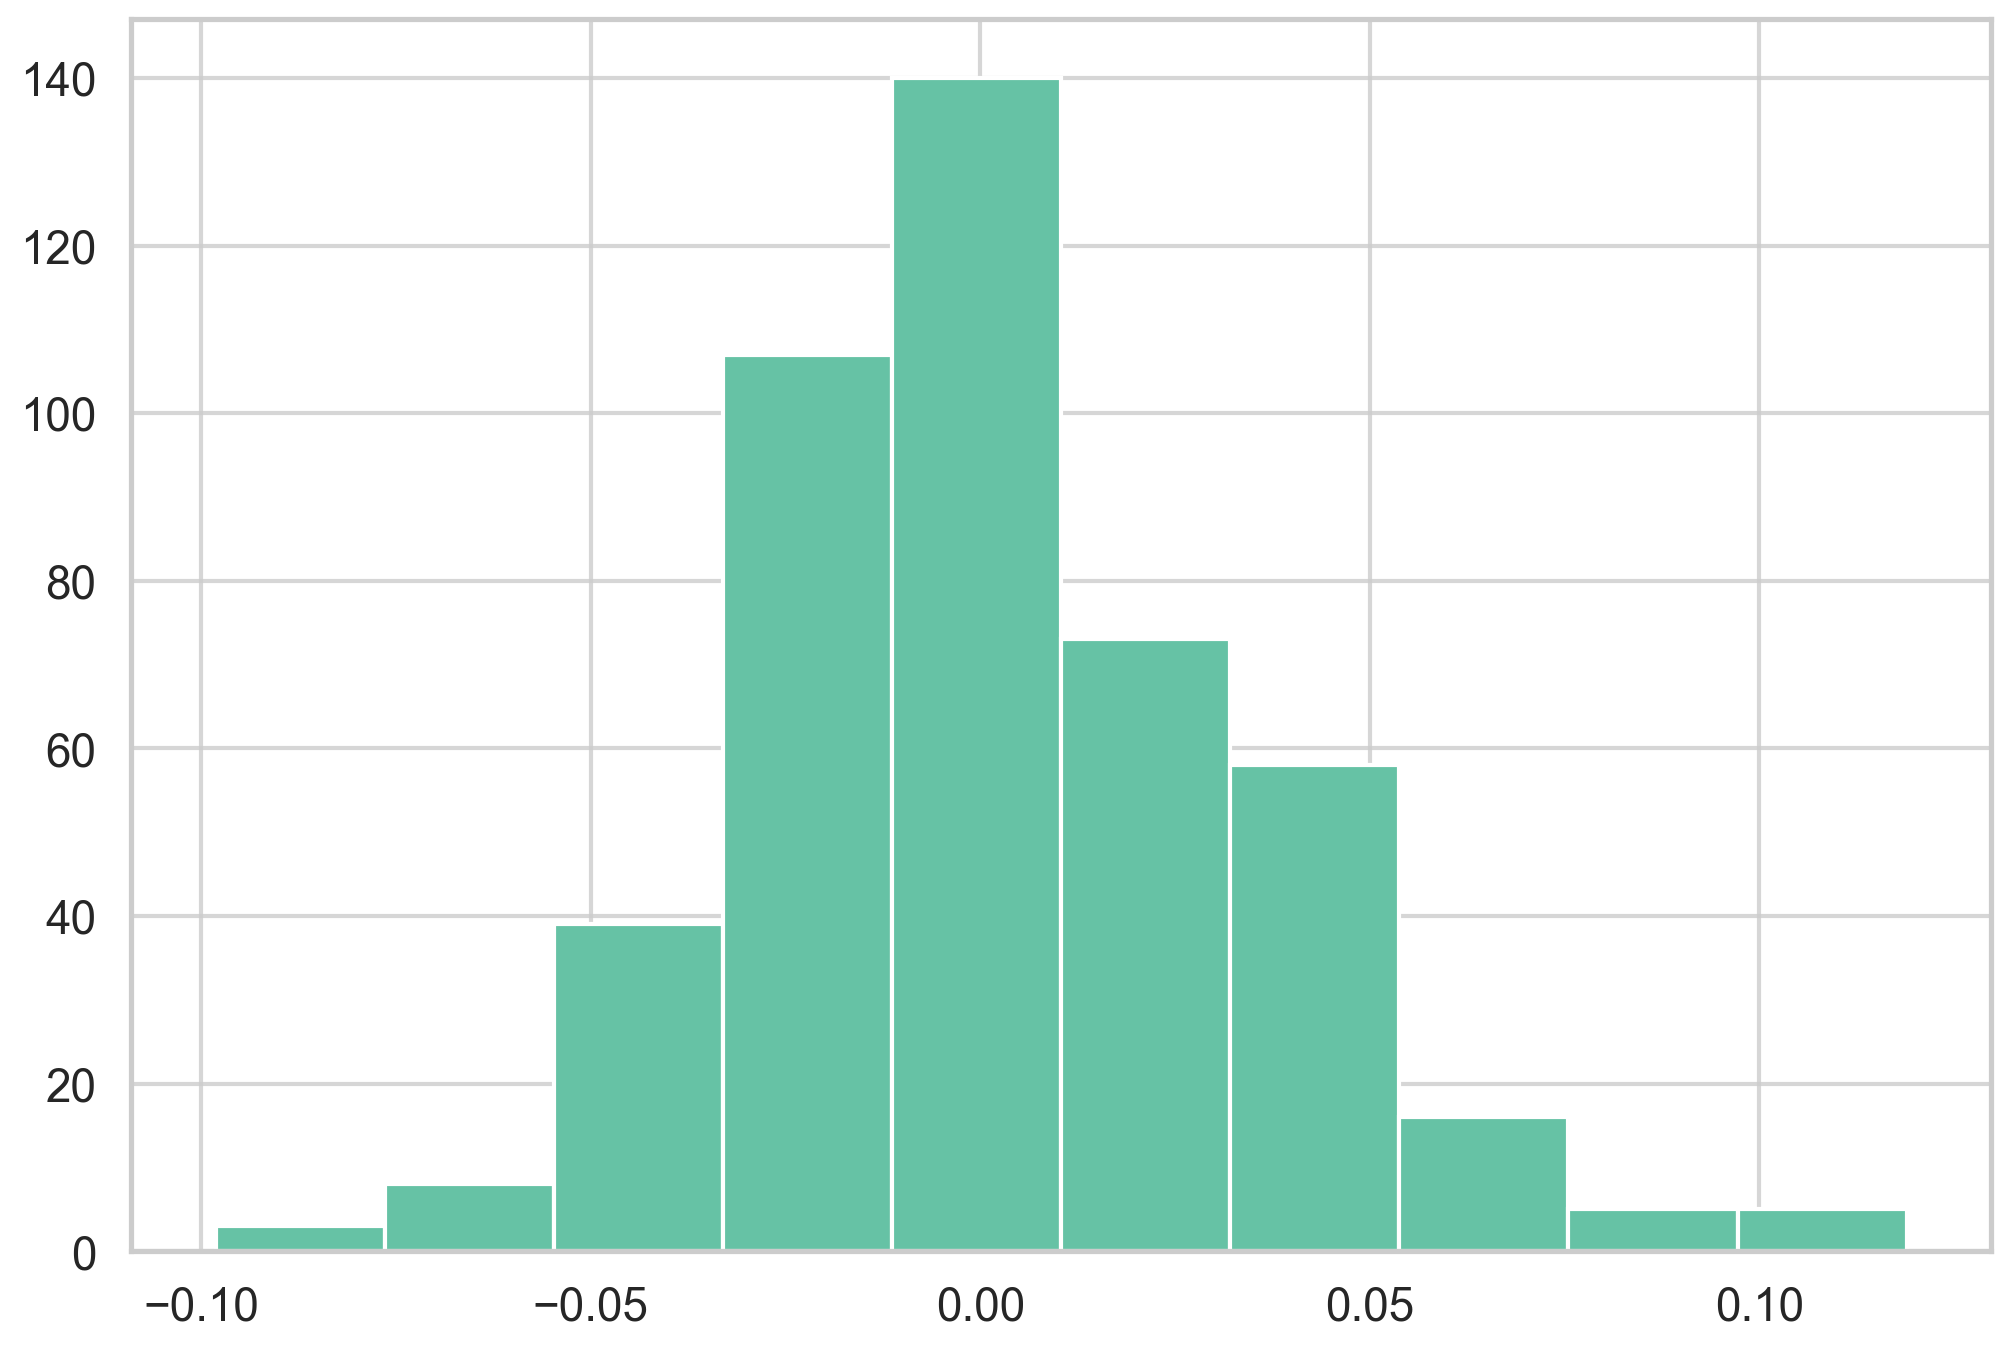

In [52]:
importances_df["shap"].hist()

In [55]:
vis_config = Fig1Config()

cmaps = config.get_colormaps()
cmap = cmaps["weighted"]
vis_config.COLORMAP = "coolwarm"

vis_config.VMIN = -0.05
vis_config.VMAX = 0.05
plotter = BrainPlotter(vis_config)

2025-09-07 16:22:05.262 | INFO     | __main__:plot_single_metric:276 - Creating brain plots for importance
2025-09-07 16:22:05.262 | INFO     | __main__:setup_surfaces:30 - Setting up brain surfaces and parcellations
2025-09-07 16:22:05.267 | SUCCESS  | __main__:setup_surfaces:39 - Brain surfaces and parcellations loaded successfully
2025-09-07 16:22:05.267 | INFO     | __main__:prepare_value_maps:57 - Preparing value maps for shap
2025-09-07 16:22:05.295 | INFO     | __main__:prepare_value_maps:97 - Prepared maps with 200 LH, 200 RH, and 54 subcortical regions
2025-09-07 16:22:05.295 | INFO     | __main__:plot_cortical_surface:121 - Creating cortical surface plots
2025-09-07 16:22:05.309 | INFO     | __main__:plot_cortical_surface:143 - Plotting left hemisphere
2025-09-07 16:22:06.216 | INFO     | __main__:plot_cortical_surface:177 - Saved left hemisphere plot to /media/storage/phd/athletes_brain/figures/predictions/all/left_importance.png
2025-09-07 16:22:06.216 | INFO     | __main__

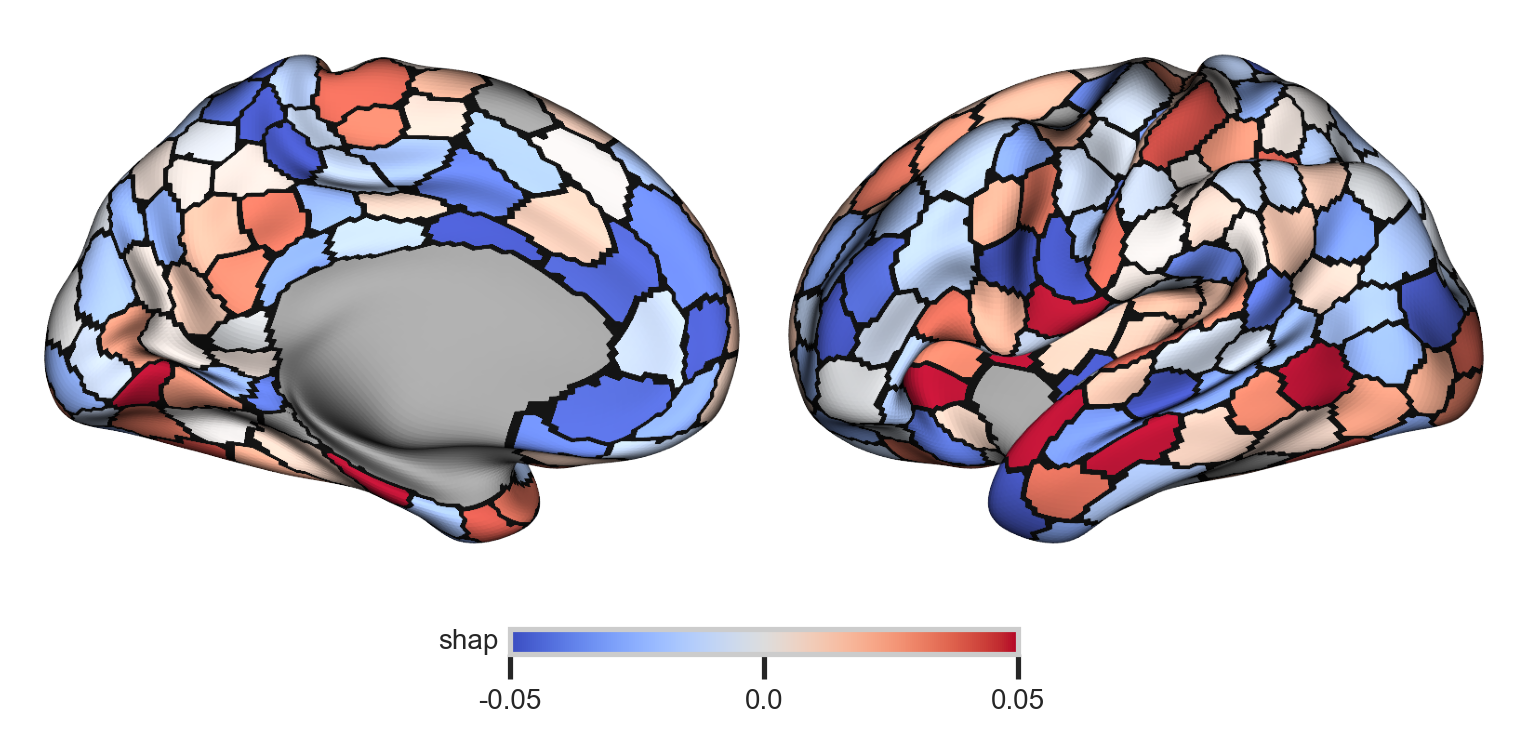

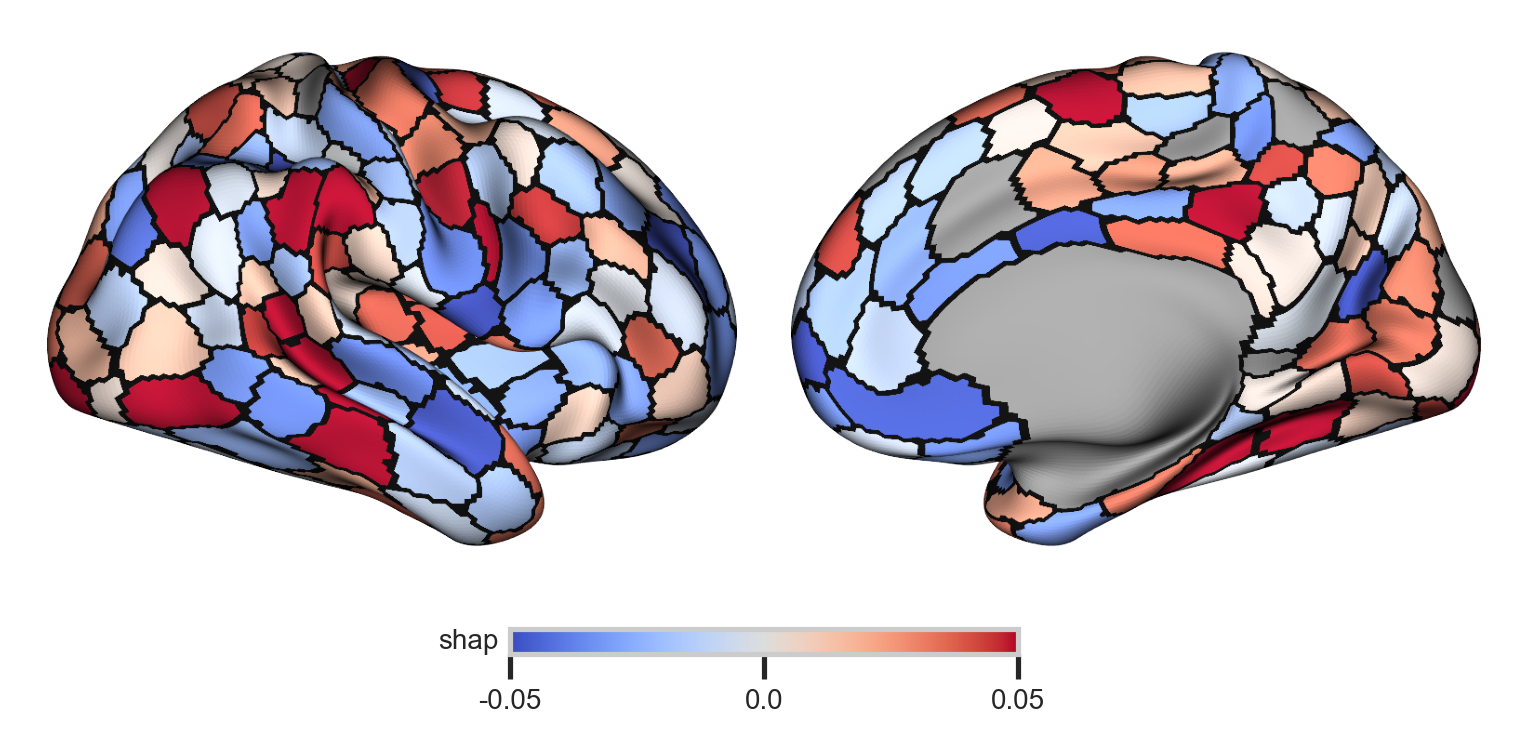

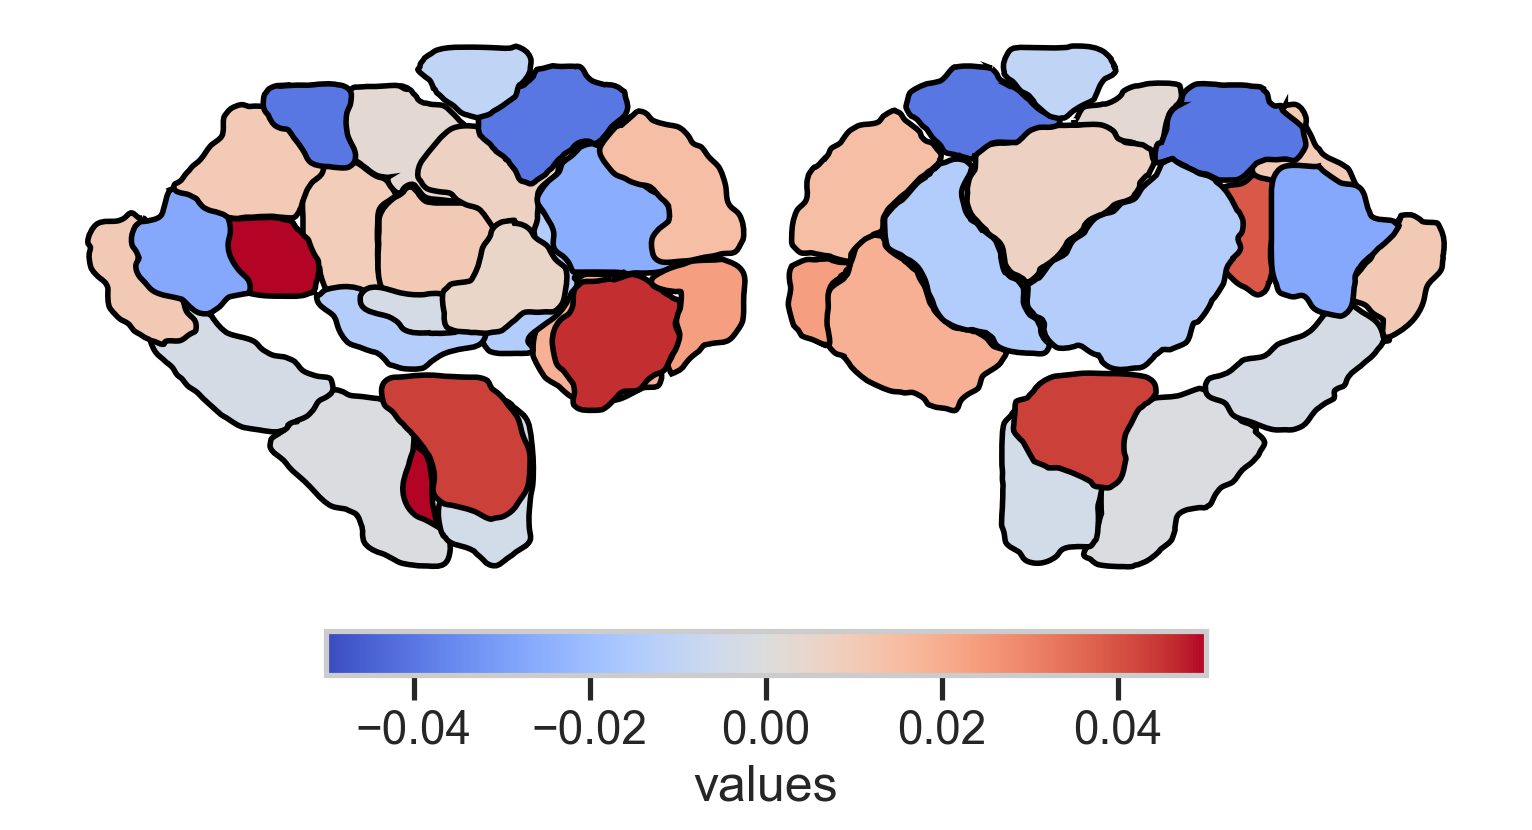

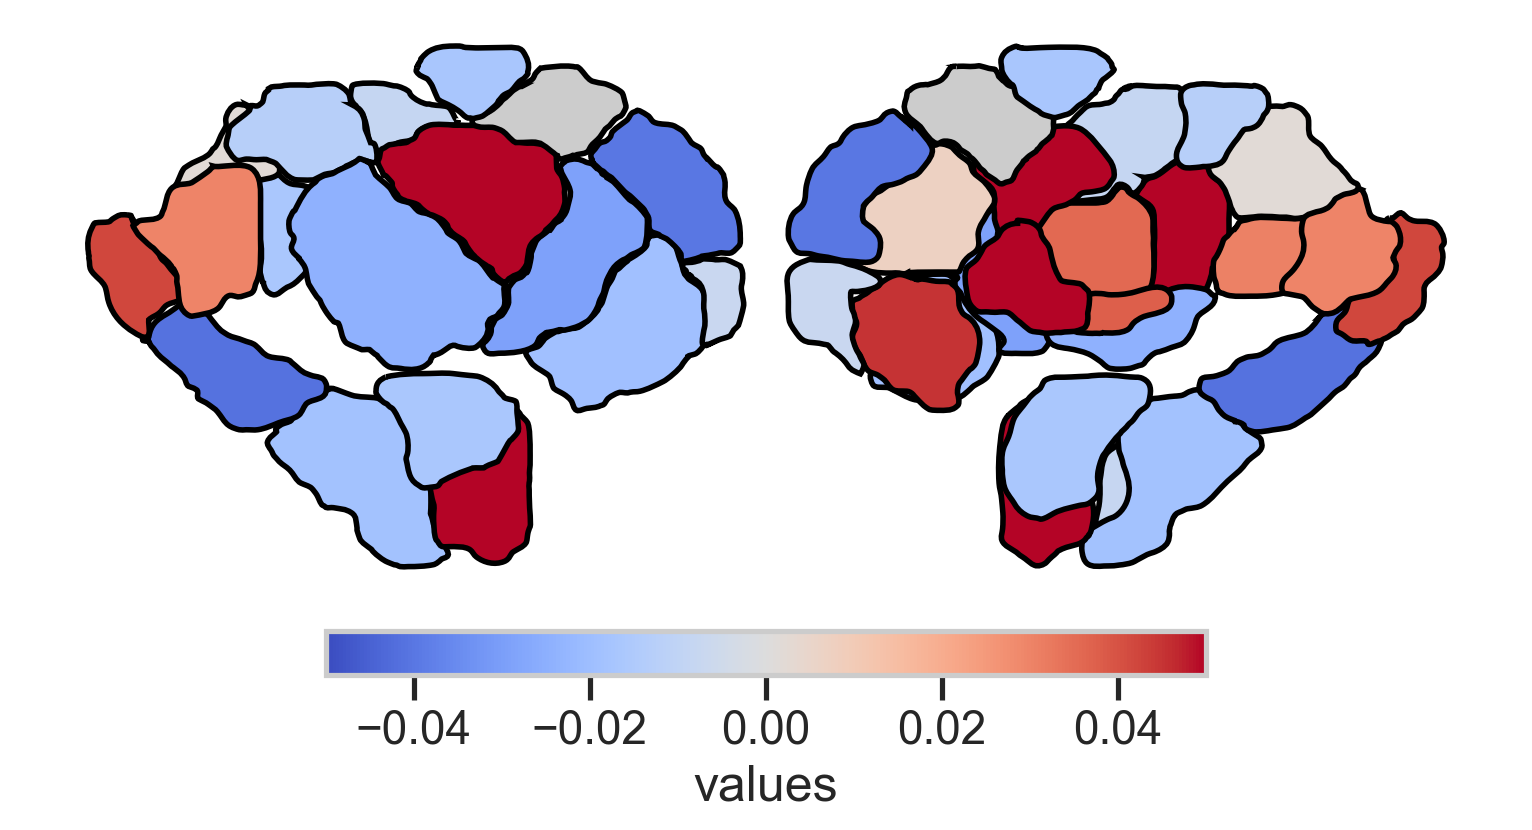

In [56]:
plotter.plot_single_metric(
    results_df=importances_df,
    metric_key="importance",
    output_dir=output_dir,
    p_column="pvalue",
    value_column="shap",
)